<a href="https://colab.research.google.com/github/SayaliVB/Exploratory-Data-Analysis/blob/main/255_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plot

import seaborn as sb

#read data from csv to dataframe
df = pd.read_csv('/content/used_cars_data.csv')

df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
#get a count of null values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
#drop columns: 'S.No’ and ‘New_Price’
df = df.drop(['S.No.'], axis = 1)
df = df.drop(['New_Price'], axis = 1)   #axis = 1 : drop column, not row
#df.info()

In [ ]:
#extract integer as well as float value and convert to float in value column
#extract unit as string in units column

df['Mileage_unit'] = df['Mileage'].str.extract(r'(kmpl|km/kg)')
df['Mileage'] = df['Mileage'].str.extract(r'(\d+.\d+|\d+)').astype(float)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,kmpl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_unit       7251 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


In [ ]:
#Conversion factor from km/kg to kmpl for CNG = 1.4 and LPG = 1.35
df.loc[df['Mileage_unit'] == 'km/kg', 'Mileage']*= 1.4
#df['Mileage'] = df['Mileage'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,kmpl


In [ ]:
#Drop 'Mileage_unit'
df = df.drop(['Mileage_unit'], axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
#remove unit from engine and convert to float
#converting it to int is giving error for int values, so keep it as float for now
df['Engine'] = df['Engine'].str.extract(r'(\d+)').astype(float)
#df.info()
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [ ]:
#remove unit from engine and convert to float
df['Power'] = df['Power'].str.extract(r'(\d+.\d+|\d+)').astype(float)
df.head()
#df.loc[[3800]]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [ ]:
#calculate car age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


In [ ]:
#boxplot

columns_to_boxplot = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


for column in columns_to_boxplot:
  #calculate IQR, upper_limit and lower_limit
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  min_value = df[column].min()
  if lower_limit< min_value:
    lower_limit= min_value
  upper_limit = Q3 + 1.5 * IQR
  max_value = df[column].max()
  if upper_limit> max_value:
    upper_limit = max_value
  print("For column {}, IQR = {} , lower_limit = {} and upper_limit = {} \n".format(column, IQR, lower_limit, upper_limit))

  #handle Outliers
  outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
  print("Outliers for column {}".format(column))
  display(outliers)

  #Remove outliers
  # df.loc[df[column] < lower_limit, column] = lower_limit
  # df.loc[df[column] > upper_limit, column] = upper_limit
  # df.head()

For column Car_Age, IQR = 5.0 , lower_limit = 5 and upper_limit = 20.5 

Outliers for column Car_Age


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
274,Maruti Zen VXI BSII,Mumbai,2002,60000,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.55,22
315,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07,2956.0,83.1,7.0,1.50,24
364,Maruti Zen LX,Kolkata,2003,65000,Petrol,Manual,First,17.30,993.0,60.0,5.0,0.65,21
613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.60,2523.0,63.0,7.0,1.95,24
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.00,1086.0,NaN,5.0,0.65,22
911,Maruti Zen VXI BSII,Kochi,2003,61495,Petrol,Manual,Third,17.30,993.0,60.0,5.0,1.52,21
1221,Ambassador Classic Nova Diesel,Chennai,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,1.35,21
1224,Maruti Zen VX,Jaipur,1999,70000,Petrol,Manual,Second,17.30,993.0,60.0,5.0,0.77,25
1318,Honda City 1.3 EXI,Ahmedabad,2002,85000,Petrol,Manual,First,13.00,1343.0,90.0,5.0,1.20,22
1845,Honda City 1.3 EXI,Pune,1999,140000,Petrol,Manual,First,13.00,1343.0,90.0,5.0,0.90,25


For column Kilometers_Driven, IQR = 39000.0 , lower_limit = 171 and upper_limit = 131500.0 

Outliers for column Kilometers_Driven


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,4.00,17
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0,1396.0,69.00,5.0,2.50,8
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4,1998.0,132.00,8.0,4.50,18
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997,Diesel,Automatic,First,17.2,1968.0,138.10,5.0,8.50,12
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.7,1498.0,89.84,5.0,4.42,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,Hyundai Verna CRDi SX,Hyderabad,2009,137711,Diesel,Manual,First,16.8,1493.0,110.00,5.0,NaN,15
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.8,2993.0,241.60,7.0,NaN,12
7200,Maruti Ritz LDi,Pune,2015,190000,Diesel,Manual,First,23.2,1248.0,73.94,5.0,NaN,9
7213,Tata Indica Vista Quadrajet LS,Hyderabad,2013,170000,Diesel,Manual,First,22.3,1248.0,74.00,5.0,NaN,11


For column Mileage, IQR = 5.840000000000002 , lower_limit = 6.499999999999998 and upper_limit = 29.860000000000003 

Outliers for column Mileage


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.240,998.0,58.16,5.0,1.75,14
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.000,2179.0,115.00,5.0,17.50,12
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.000,1950.0,194.00,5.0,35.67,5
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.000,1086.0,NaN,5.0,1.30,19
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,37.240,998.0,58.16,5.0,3.25,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,45.164,998.0,58.20,4.0,NaN,7
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.000,2179.0,115.00,5.0,NaN,13
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.000,1199.0,88.70,NaN,NaN,5
6958,Maruti Alto 800 CNG LXI,Kolkata,2013,14311,CNG,Manual,First,42.644,796.0,47.30,5.0,NaN,11


For column Engine, IQR = 770.0 , lower_limit = 72.0 and upper_limit = 3123.0 

Outliers for column Engine


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.50,16
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00,14
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91,8
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77,10
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.9,5.0,19.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597.0,262.6,5.0,4.75,15
6186,Mercedes-Benz S Class 2005 2013 S 350 L,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498.0,364.9,5.0,NaN,16
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,NaN,16
6842,Nissan 370Z AT,Kolkata,2012,14850,Petrol,Automatic,First,10.00,3696.0,328.5,2.0,NaN,12


For column Power, IQR = 63.099999999999994 , lower_limit = 34.2 and upper_limit = 232.75 

Outliers for column Power


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.0,11
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.5,16
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.8,14
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,24.0,13
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,Mercedes-Benz CLA 45 AMG,Kochi,2015,23742,Petrol,Automatic,First,15.04,1991.0,360.00,5.0,NaN,9
7124,Audi Q5 2008-2012 3.0 TDI Quattro,Hyderabad,2010,78265,Diesel,Automatic,First,12.19,2967.0,236.00,5.0,NaN,14
7156,BMW 7 Series 740i Sedan,Kochi,2013,86107,Petrol,Automatic,First,8.45,2979.0,321.00,5.0,NaN,11
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,12


For column Seats, IQR = 0.0 , lower_limit = 5.0 and upper_limit = 5.0 

Outliers for column Seats


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.0,12
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.5,8
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,15.0,10
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00,7.0,4.0,17
32,Mahindra Ssangyong Rexton RX7,Bangalore,2013,72000,Diesel,Automatic,Second,11.18,2696.0,184.00,7.0,12.5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Toyota Fortuner 3.0 Diesel,Delhi,2011,75000,Diesel,Manual,First,11.50,2982.0,171.00,7.0,NaN,13
7194,Tata Nano XTA,Coimbatore,2016,53590,Petrol,Automatic,First,21.90,624.0,37.48,4.0,NaN,8
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,12
7206,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Hyderabad,2014,27641,Diesel,Manual,First,12.99,2494.0,100.00,7.0,NaN,10


For column Price, IQR = 6.449999999999999 , lower_limit = 0.44 and upper_limit = 19.625 

Outliers for column Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,10
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,10
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50,9
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,11
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,21.43,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,Audi Q3 2.0 TDI,Bangalore,2014,65630,Diesel,Automatic,First,15.73,1968.0,174.33,5.0,21.75,10
5970,Mercedes-Benz GLA Class 200 Sport,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991.0,183.00,5.0,26.76,6
5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,30.54,8
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00,11


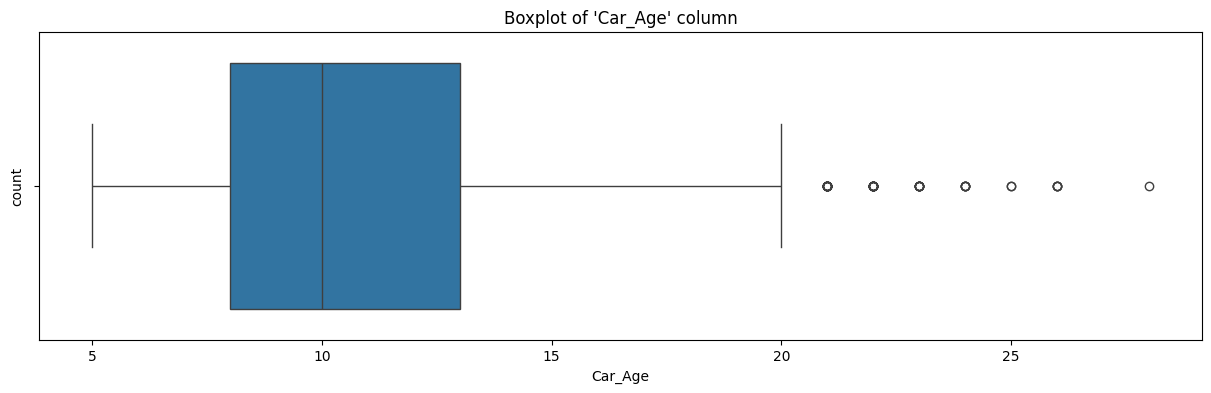

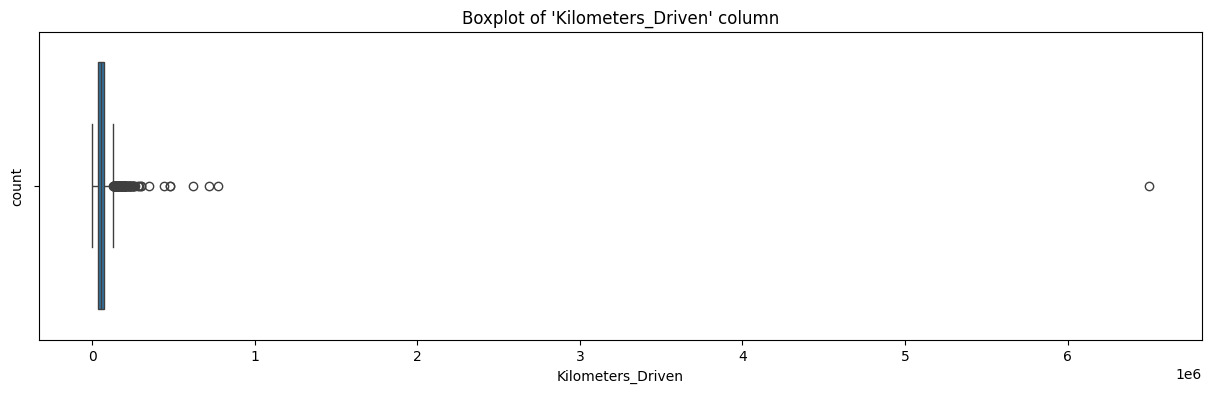

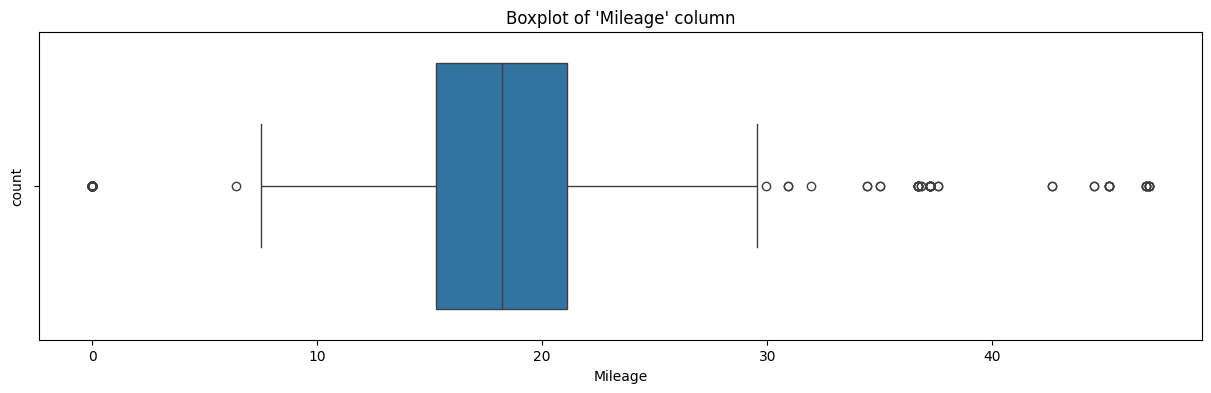

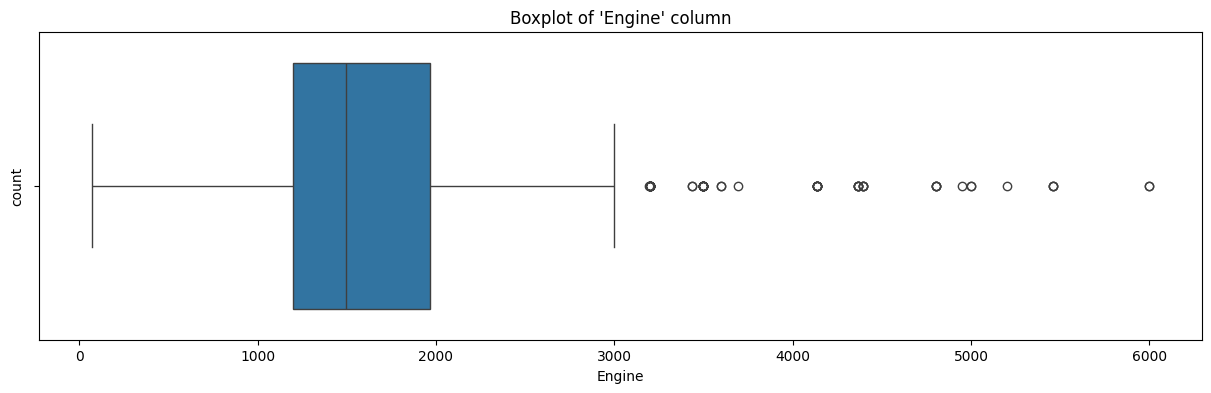

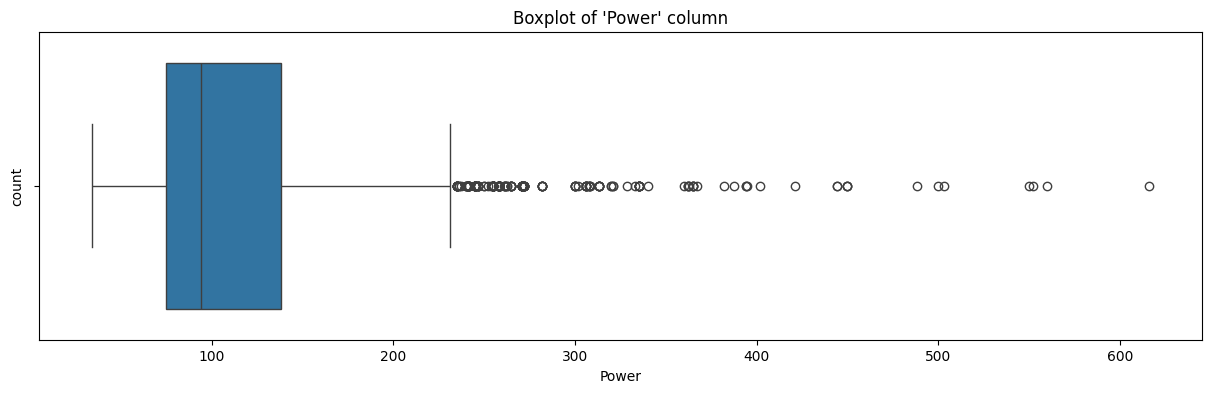

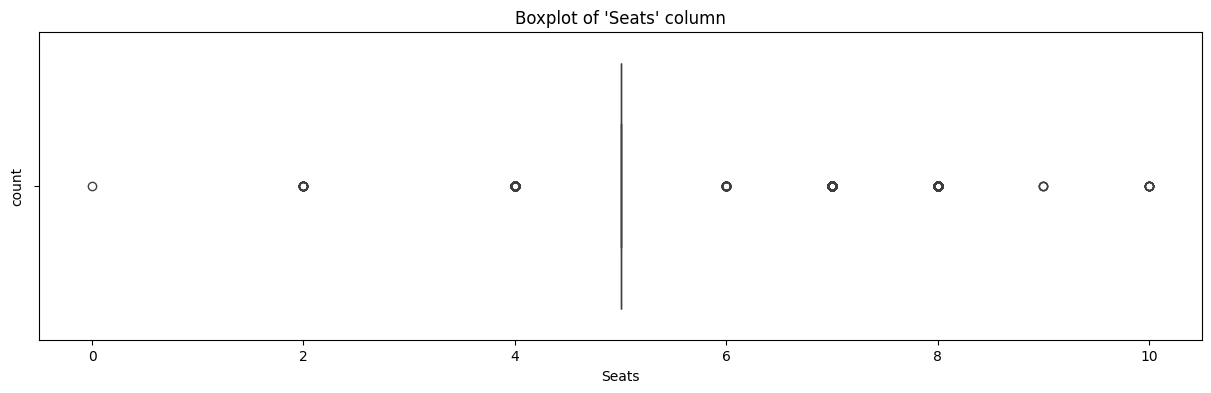

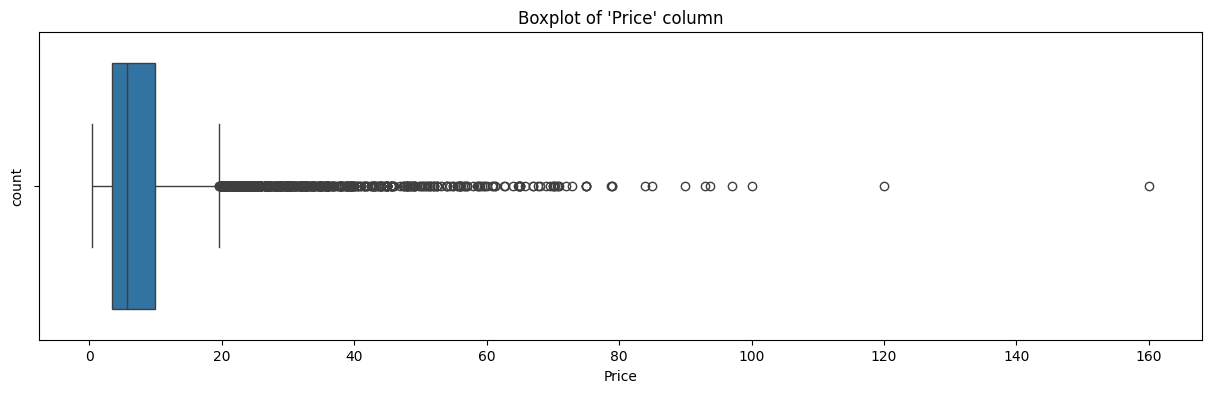

In [ ]:
#boxplots without handling errors

for col in columns_to_boxplot:
  plot.figure(figsize = (15, 4))
  plot.ylabel('count')
  sb.boxplot(x=df[col])
  plot.title("Boxplot of '{}' column".format(col))
  plot.show()

In [ ]:
#Get the row index containing the extreme value
extreme_value_index = []

extreme_value_index.append(df['Kilometers_Driven'].idxmax())
extreme_value_index.append(df['Price'].idxmax())
extreme_value_index.extend(df[df['Mileage'] == df['Mileage'].min()].index)
print(extreme_value_index)

# Drop the row with the extreme value
df_updated = df.drop(extreme_value_index)

[2328, 4079, 14, 67, 79, 194, 229, 262, 307, 424, 443, 544, 631, 647, 707, 749, 915, 962, 996, 1059, 1259, 1271, 1308, 1345, 1354, 1385, 1419, 1460, 1764, 1857, 2053, 2096, 2130, 2267, 2343, 2542, 2597, 2681, 2780, 2842, 3033, 3044, 3061, 3093, 3189, 3210, 3271, 3516, 3522, 3645, 4152, 4234, 4302, 4412, 4629, 4687, 4704, 5016, 5022, 5119, 5270, 5311, 5374, 5426, 5529, 5647, 5875, 5943, 5972, 6011, 6090, 6093, 6177, 6205, 6439, 6454, 6491, 6576, 6633, 6697, 6857, 6957, 7226]


In [ ]:
#df_updated.loc[[4079]]
#df_updated.loc[[194]]

In [ ]:
for column in columns_to_boxplot:
  #calculate IQR, upper_limit and lower_limit
  Q1 = df_updated[column].quantile(0.25)
  Q3 = df_updated[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  min_value = df[column].min()
  if lower_limit< min_value:
    lower_limit= min_value
  upper_limit = Q3 + 1.5 * IQR
  max_value = df[column].max()
  if upper_limit> max_value:
    upper_limit = max_value
  print("For column {}, IQR = {} , lower_limit = {} and upper_limit = {} \n".format(column, IQR, lower_limit, upper_limit))

  #handle Outliers
  outliers = df_updated[(df_updated[column] < lower_limit) | (df_updated[column] > upper_limit)]
  print("Outliers for column {}".format(column))
  display(outliers)

For column Car_Age, IQR = 4.0 , lower_limit = 5 and upper_limit = 18.0 

Outliers for column Car_Age


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,19
222,Maruti Wagon R LXI,Chennai,2004,61000,Petrol,Manual,Second,18.90,998.0,67.1,5.0,1.25,20
274,Maruti Zen VXI BSII,Mumbai,2002,60000,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.55,22
315,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07,2956.0,83.1,7.0,1.50,24
336,Toyota Corolla H4,Chennai,2004,105000,Petrol,Automatic,Second,11.30,1794.0,125.0,5.0,2.50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,Maruti Alto LX,Pune,2004,70332,Petrol,Manual,Third,19.70,796.0,46.3,5.0,NaN,20
6986,Mercedes-Benz E-Class E240 V6 AT,Mumbai,2003,66800,Petrol,Automatic,Second,11.20,2497.0,203.0,5.0,NaN,21
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.20,1389.0,88.0,5.0,NaN,19
7138,Toyota Corolla Executive (HE),Chennai,2003,136441,Petrol,Manual,First,13.40,1794.0,125.0,5.0,NaN,21


For column Kilometers_Driven, IQR = 39000.0 , lower_limit = 171 and upper_limit = 131500.0 

Outliers for column Kilometers_Driven


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,4.00,17
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0,1396.0,69.00,5.0,2.50,8
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4,1998.0,132.00,8.0,4.50,18
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997,Diesel,Automatic,First,17.2,1968.0,138.10,5.0,8.50,12
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.7,1498.0,89.84,5.0,4.42,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,Hyundai Verna CRDi SX,Hyderabad,2009,137711,Diesel,Manual,First,16.8,1493.0,110.00,5.0,NaN,15
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.8,2993.0,241.60,7.0,NaN,12
7200,Maruti Ritz LDi,Pune,2015,190000,Diesel,Manual,First,23.2,1248.0,73.94,5.0,NaN,9
7213,Tata Indica Vista Quadrajet LS,Hyderabad,2013,170000,Diesel,Manual,First,22.3,1248.0,74.00,5.0,NaN,11


For column Mileage, IQR = 5.700000000000001 , lower_limit = 6.85 and upper_limit = 29.650000000000002 

Outliers for column Mileage


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.240,998.0,58.16,5.0,1.75,14
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,37.240,998.0,58.16,5.0,3.25,11
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,36.820,998.0,67.10,5.0,1.40,16
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,37.562,796.0,38.40,5.0,2.10,12
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,36.680,998.0,58.20,5.0,2.85,12
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,36.820,998.0,67.10,5.0,2.00,13
1218,Maruti Wagon R LXI CNG,Pune,2015,70000,CNG,Manual,First,36.680,998.0,58.20,5.0,3.65,9
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,46.816,796.0,40.30,4.0,3.50,6
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,46.956,998.0,67.04,5.0,2.96,11
1357,Maruti Wagon R LXI CNG,Mumbai,2014,40000,CNG,Manual,Second,37.240,998.0,58.16,5.0,3.15,10


For column Engine, IQR = 770.0 , lower_limit = 72.0 and upper_limit = 3123.0 

Outliers for column Engine


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.50,16
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00,14
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91,8
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77,10
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.9,5.0,19.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,100.00,9
6186,Mercedes-Benz S Class 2005 2013 S 350 L,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498.0,364.9,5.0,NaN,16
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,NaN,16
6842,Nissan 370Z AT,Kolkata,2012,14850,Petrol,Automatic,First,10.00,3696.0,328.5,2.0,NaN,12


For column Power, IQR = 63.099999999999994 , lower_limit = 34.2 and upper_limit = 232.75 

Outliers for column Power


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.0,11
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.5,16
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.8,14
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,24.0,13
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,Mercedes-Benz CLA 45 AMG,Kochi,2015,23742,Petrol,Automatic,First,15.04,1991.0,360.00,5.0,NaN,9
7124,Audi Q5 2008-2012 3.0 TDI Quattro,Hyderabad,2010,78265,Diesel,Automatic,First,12.19,2967.0,236.00,5.0,NaN,14
7156,BMW 7 Series 740i Sedan,Kochi,2013,86107,Petrol,Automatic,First,8.45,2979.0,321.00,5.0,NaN,11
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,12


For column Seats, IQR = 0.0 , lower_limit = 5.0 and upper_limit = 5.0 

Outliers for column Seats


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.0,12
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.5,8
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,15.0,10
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00,7.0,4.0,17
32,Mahindra Ssangyong Rexton RX7,Bangalore,2013,72000,Diesel,Automatic,Second,11.18,2696.0,184.00,7.0,12.5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Toyota Fortuner 3.0 Diesel,Delhi,2011,75000,Diesel,Manual,First,11.50,2982.0,171.00,7.0,NaN,13
7194,Tata Nano XTA,Coimbatore,2016,53590,Petrol,Automatic,First,21.90,624.0,37.48,4.0,NaN,8
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,NaN,12
7206,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Hyderabad,2014,27641,Diesel,Manual,First,12.99,2494.0,100.00,7.0,NaN,10


For column Price, IQR = 6.4 , lower_limit = 0.44 and upper_limit = 19.5 

Outliers for column Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,10
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,10
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,23.50,9
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,11
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,21.43,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,Toyota Fortuner 4x4 AT,Chennai,2015,95000,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,19.60,9
5970,Mercedes-Benz GLA Class 200 Sport,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991.0,183.00,5.0,26.76,6
5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,30.54,8
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00,11


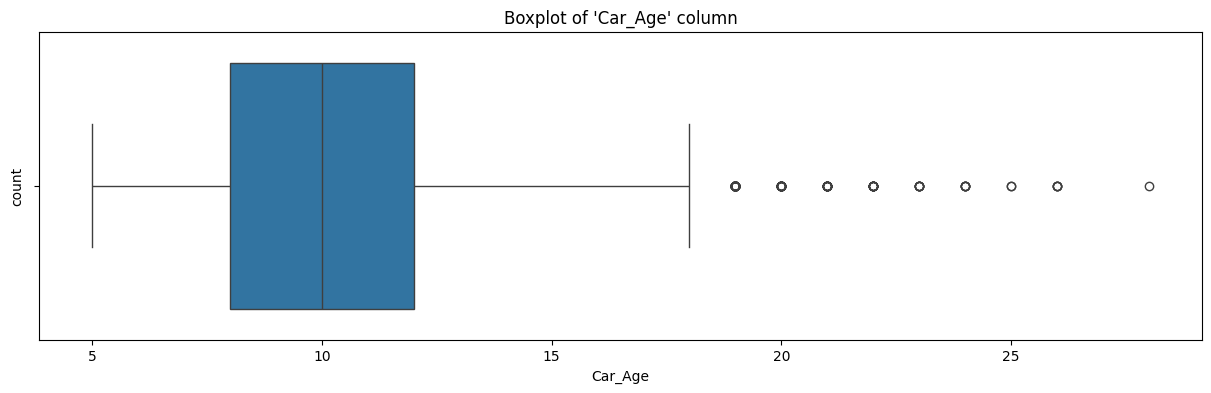

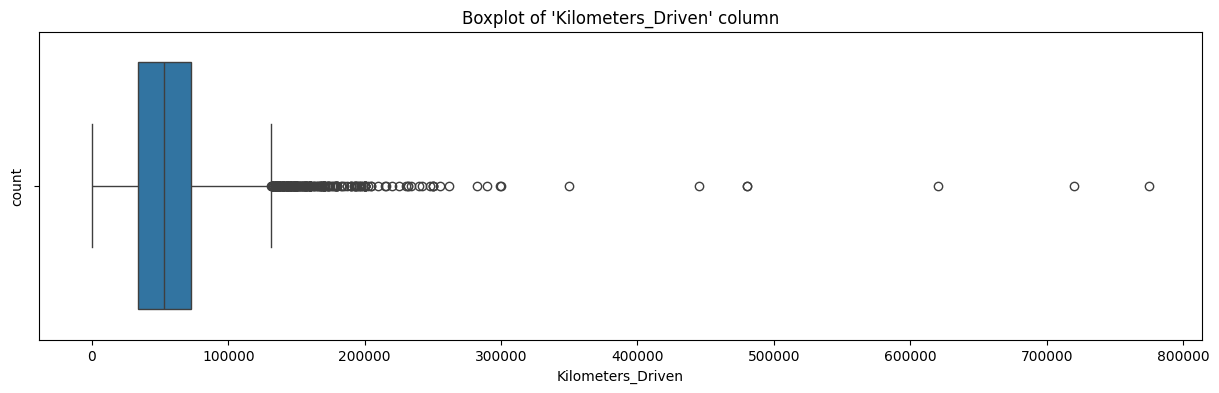

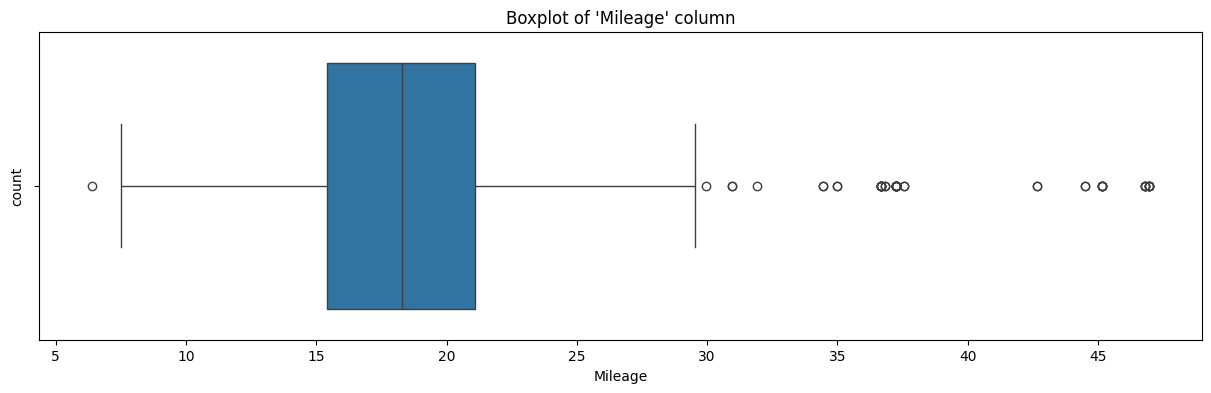

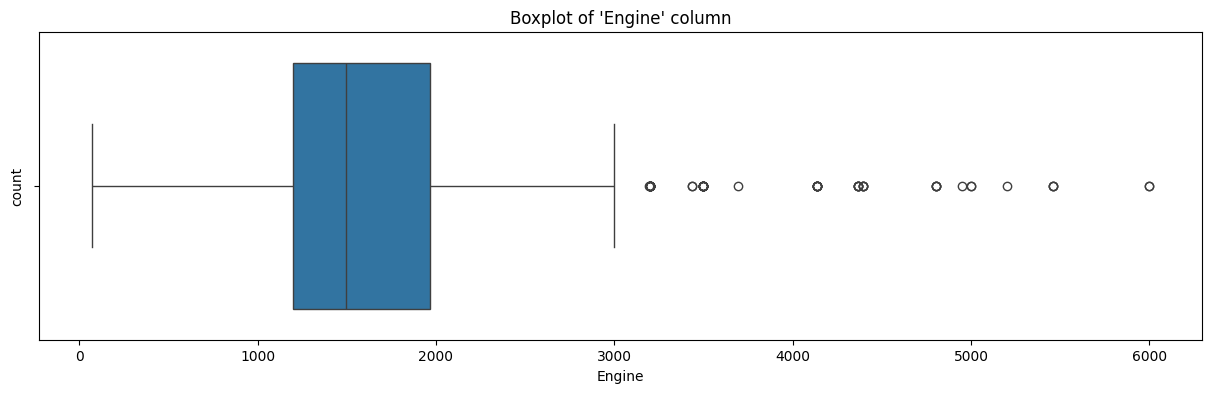

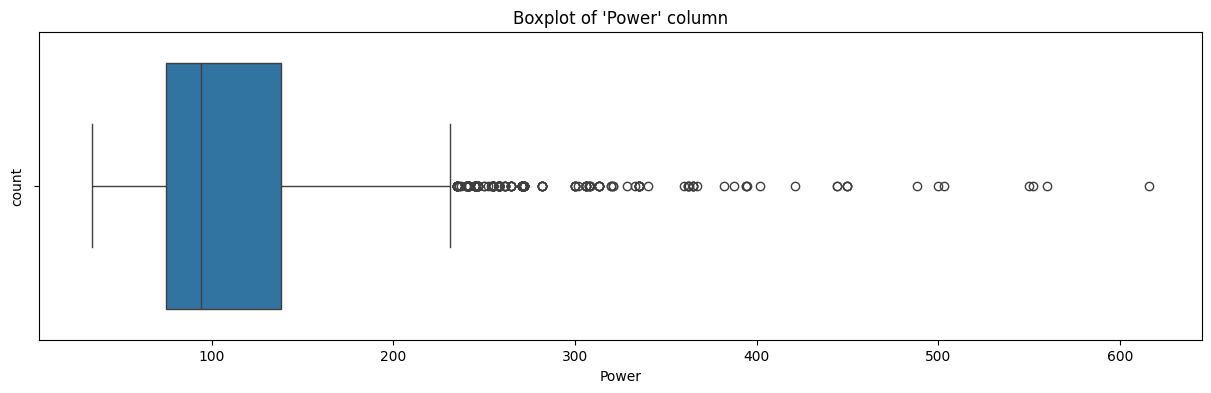

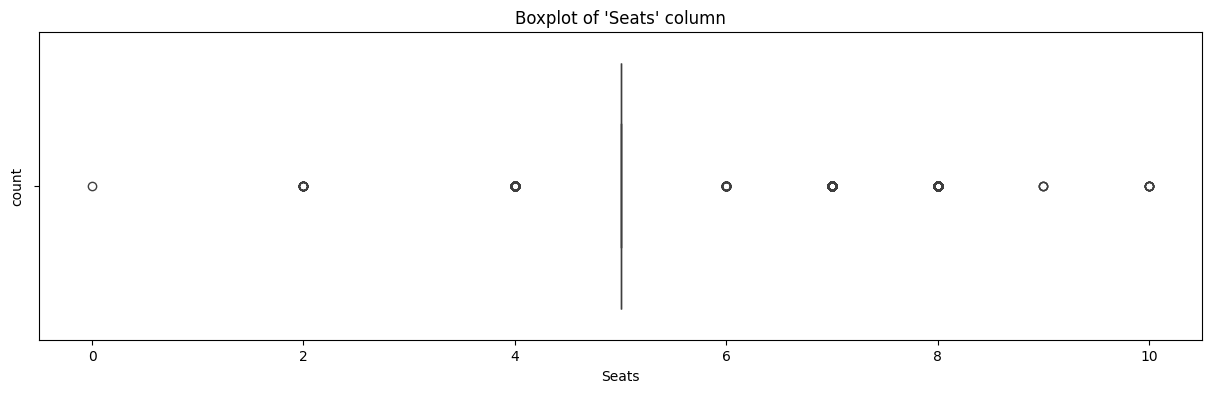

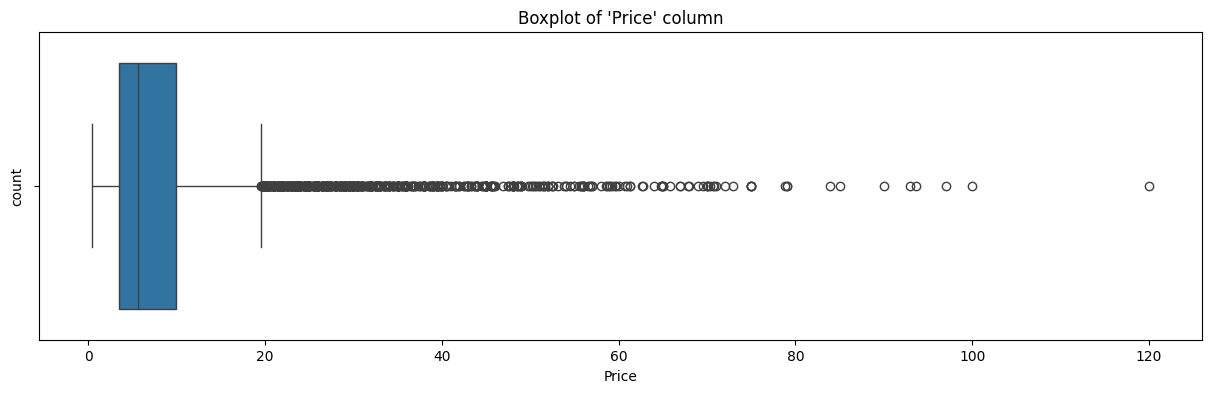

In [ ]:
#boxplots after handling errors

for col in columns_to_boxplot:
  plot.figure(figsize = (15, 4))
  plot.ylabel('count')
  sb.boxplot(x=df_updated[col])
  plot.title("Boxplot of '{}' column".format(col))
  plot.show()

In [ ]:
columns_to_calculate = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
correlation_coefficients = {}
for col in columns_to_calculate:
    correlation_coefficient = df_updated['Price'].corr(df_updated[col])
    correlation_coefficients[col] = correlation_coefficient
    print("Correlation coefficient between 'Price' and '{}': {:.2f}".format(col, correlation_coefficient))

Correlation coefficient between 'Price' and 'Car_Age': -0.30
Correlation coefficient between 'Price' and 'Kilometers_Driven': -0.17
Correlation coefficient between 'Price' and 'Mileage': -0.33
Correlation coefficient between 'Price' and 'Engine': 0.66
Correlation coefficient between 'Price' and 'Power': 0.78
Correlation coefficient between 'Price' and 'Seats': 0.06


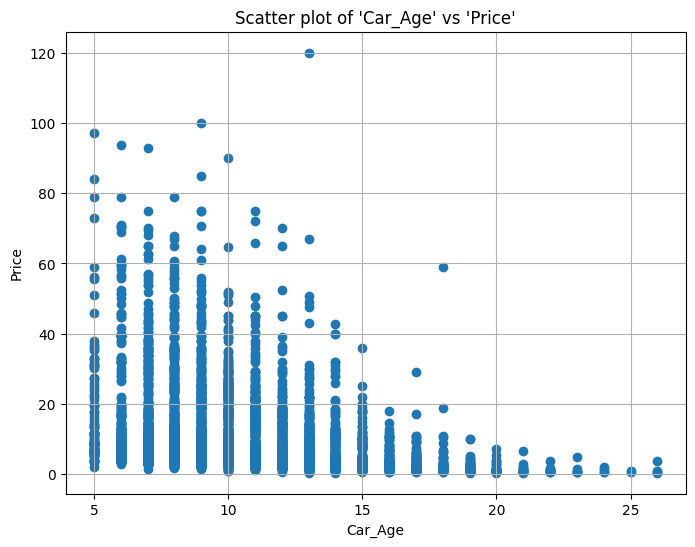

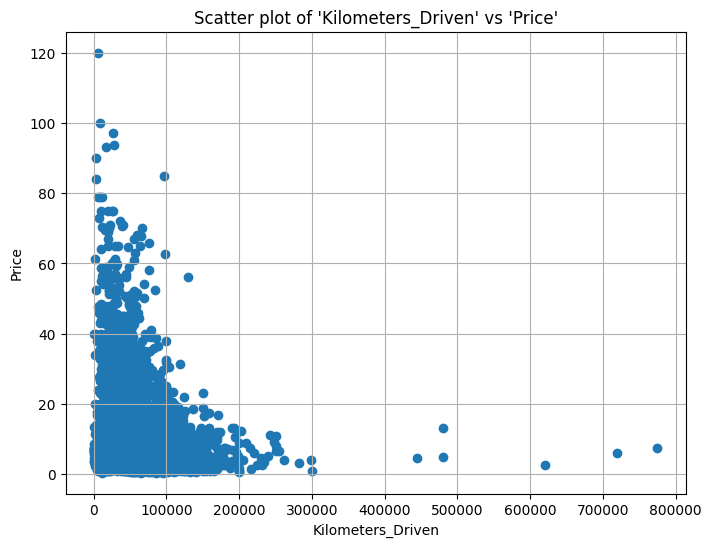

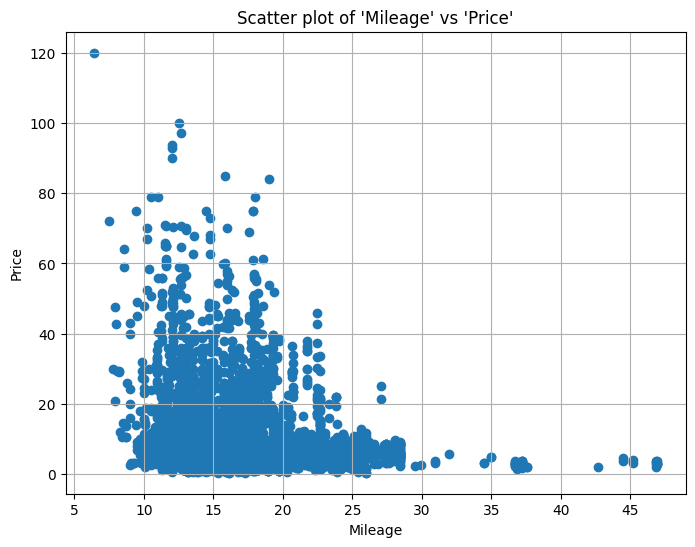

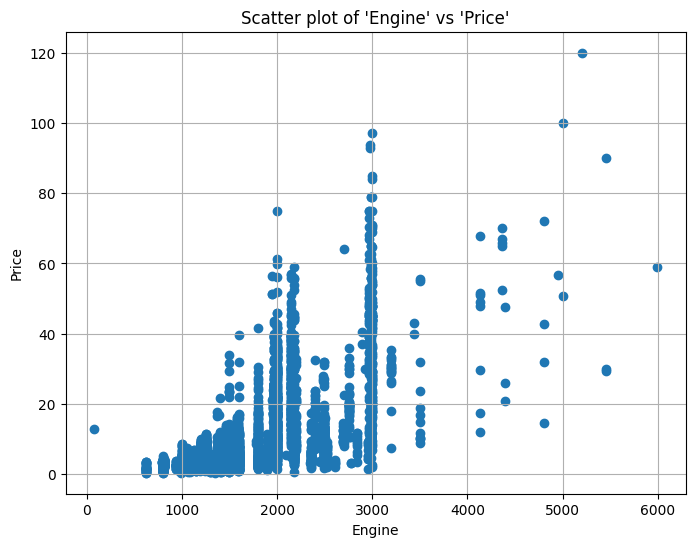

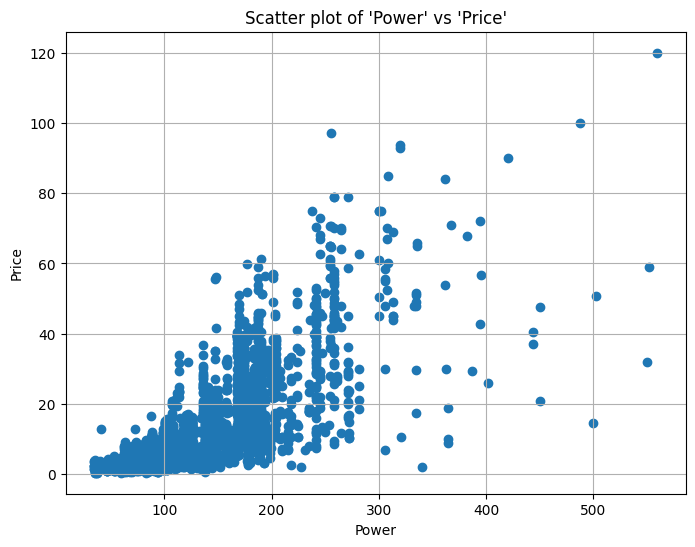

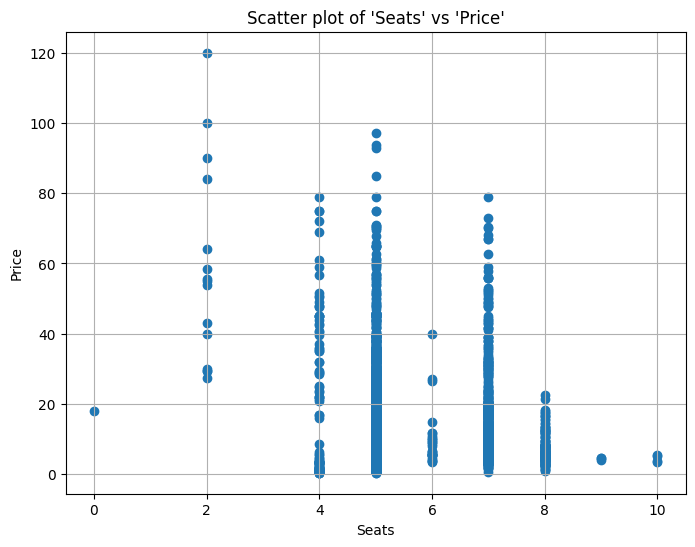

In [ ]:
#Create scatter plots
for col in columns_to_calculate:
    plot.figure(figsize=(8, 6))
    plot.scatter(df_updated[col], df_updated['Price'])
    plot.title("Scatter plot of '{}' vs 'Price'".format(col))
    plot.xlabel(col)
    plot.ylabel('Price')
    plot.grid(True)
    plot.show()

The dataset provides insights into various aspects of car listings, including attributes like car age, kilometers driven, mileage, engine capacity, power, seats, and price.

**Data distribution**

Examining the distribution of each feature's data, we observe that most columns exhibit a range of values with varying degrees of spread. For instance, 'Car_Age' has a relatively even distribution, with cars spanning a range of ages from newer to older vehicles. 'Kilometers_Driven' shows a wider spread, indicating variability in usage among the vehicles in the dataset, with some having been driven extensively and others relatively less. In the 'Mileage' column, the distribution appears to be skewed, with a concentration of values around the higher end of the scale, suggesting that most vehicles have relatively good fuel efficiency, but there are outliers with exceptionally low mileage. Similarly, 'Engine' and 'Power' columns have distributions that are right-skewed, indicating that most vehicles have moderate engine sizes and power outputs, but there are outliers with significantly larger engines and higher power ratings.

**Outliers**

Outliers are present in several attributes, indicating instances where data points significantly deviate from the norm. For instance, some cars have unusually high or low values for kilometers driven, mileage, engine capacity, power, and price. These outliers could represent unique or rare vehicles within the dataset.

**Correlation**

We find varying degrees of correlation between the 'Price' feature and other features. Notably, there is a strong positive correlation between 'Price' and 'Power' (0.78), indicating that cars with higher power tend to have higher prices. Similarly, there is a moderate positive correlation between 'Price' and 'Engine' (0.66). On the other hand, there are negative correlations between 'Price' and 'Car_Age' (-0.30), 'Kilometers_Driven' (-0.17), and 'Mileage' (-0.33), suggesting that as these features increase, the price tends to decrease. The correlation between 'Price' and 'Seats' is very weak (0.06), indicating a negligible relationship between these two variables.

Overall, this analysis provides valuable insights into the distribution of car data, the presence of outliers, and the relationships between different attributes, which can inform decision-making processes in the automotive industry.

In [ ]:
continuous_features = ['Mileage', 'Engine', 'Power', 'Price']
for feature in continuous_features:
  print('Skew :', round(df_updated[feature].skew(), 2))

df_cleaned = df_updated.copy()

Skew : 0.88
Skew : 1.42
Skew : 1.97
Skew : 3.11


In [ ]:
categorical_feature = ['Seats']


subclass_feature = ['Fuel_Type', 'Year']

for subclass_feature in subclass_feature:
    for feature in categorical_feature:
        #Impute missing values using mode for categorical features
        df_cleaned[feature] = df_cleaned.groupby(subclass_feature)[feature].transform(lambda x: x.fillna(x.mode()[0]))

    for feature in continuous_features:
        #Impute missing values using mean for continuous features
        #df_cleaned[feature] = df_cleaned.groupby(subclass_feature)[feature].transform(lambda x: x.fillna(x.mean()))
        #using median instead of mean
        df_cleaned[feature] = df_cleaned.groupby(subclass_feature)[feature].transform(lambda x: x.fillna(x.median()))


#df_cleaned.loc[[3810]]

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Justifications for choice of mode, mean, or median:**



Mode is used for categorical/discrete features because it represents the most frequent value in a subgroup, making it a reasonable estimate for missing values within the same subgroup.
Mean or median is used for continuous features because they provide measures of central tendency that are robust to outliers and represent typical values within each subgroup. Median is preferred when the data is skewed or contains outliers, while mean can be used for symmetric distributions. Here, I am using median since the data is positively skewed.


In [ ]:
null_values = df_cleaned[df_cleaned['Power'].isnull()]

print(null_values)

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price, Car_Age]
Index: []


In [ ]:

for column in columns_to_boxplot:
  #calculate IQR, upper_limit and lower_limit
  Q1 = df_cleaned[column].quantile(0.25)
  Q3 = df_cleaned[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  min_value = df[column].min()
  if lower_limit< min_value:
    lower_limit= min_value
  upper_limit = Q3 + 1.5 * IQR
  max_value = df[column].max()
  if upper_limit> max_value:
    upper_limit = max_value
  print("For column {}, IQR = {} , lower_limit = {} and upper_limit = {} \n".format(column, IQR, lower_limit, upper_limit))

  #handle Outliers
  outliers = df_cleaned[(df_cleaned[column] < lower_limit) | (df_cleaned[column] > upper_limit)]
  print("Outliers for column {}".format(column))
  display(outliers)

For column Car_Age, IQR = 4.0 , lower_limit = 5 and upper_limit = 18.0 

Outliers for column Car_Age


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,83.1,5.0,0.85,19
222,Maruti Wagon R LXI,Chennai,2004,61000,Petrol,Manual,Second,18.90,998.0,67.1,5.0,1.25,20
274,Maruti Zen VXI BSII,Mumbai,2002,60000,Petrol,Manual,Third,17.30,993.0,60.0,5.0,0.55,22
315,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07,2956.0,83.1,7.0,1.50,24
336,Toyota Corolla H4,Chennai,2004,105000,Petrol,Automatic,Second,11.30,1794.0,125.0,5.0,2.50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,Maruti Alto LX,Pune,2004,70332,Petrol,Manual,Third,19.70,796.0,46.3,5.0,4.15,20
6986,Mercedes-Benz E-Class E240 V6 AT,Mumbai,2003,66800,Petrol,Automatic,Second,11.20,2497.0,203.0,5.0,4.15,21
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.20,1389.0,88.0,5.0,4.15,19
7138,Toyota Corolla Executive (HE),Chennai,2003,136441,Petrol,Manual,First,13.40,1794.0,125.0,5.0,4.15,21


For column Kilometers_Driven, IQR = 39000.0 , lower_limit = 171 and upper_limit = 131500.0 

Outliers for column Kilometers_Driven


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8,2494.0,102.00,7.0,4.00,17
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0,1396.0,69.00,5.0,2.50,8
77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4,1998.0,132.00,8.0,4.50,18
154,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2012,136997,Diesel,Automatic,First,17.2,1968.0,138.10,5.0,8.50,12
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.7,1498.0,89.84,5.0,4.42,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,Hyundai Verna CRDi SX,Hyderabad,2009,137711,Diesel,Manual,First,16.8,1493.0,110.00,5.0,7.75,15
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.8,2993.0,241.60,7.0,7.75,12
7200,Maruti Ritz LDi,Pune,2015,190000,Diesel,Manual,First,23.2,1248.0,73.94,5.0,7.75,9
7213,Tata Indica Vista Quadrajet LS,Hyderabad,2013,170000,Diesel,Manual,First,22.3,1248.0,74.00,5.0,7.75,11


For column Mileage, IQR = 5.700000000000001 , lower_limit = 6.85 and upper_limit = 29.650000000000002 

Outliers for column Mileage


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.240,998.0,58.16,5.0,1.75,14
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,37.240,998.0,58.16,5.0,3.25,11
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,36.820,998.0,67.10,5.0,1.40,16
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,37.562,796.0,38.40,5.0,2.10,12
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,36.680,998.0,58.20,5.0,2.85,12
1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,36.820,998.0,67.10,5.0,2.00,13
1218,Maruti Wagon R LXI CNG,Pune,2015,70000,CNG,Manual,First,36.680,998.0,58.20,5.0,3.65,9
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,46.816,796.0,40.30,4.0,3.50,6
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,46.956,998.0,67.04,5.0,2.96,11
1357,Maruti Wagon R LXI CNG,Mumbai,2014,40000,CNG,Manual,Second,37.240,998.0,58.16,5.0,3.15,10


For column Engine, IQR = 770.0 , lower_limit = 72.0 and upper_limit = 3123.0 

Outliers for column Engine


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.50,16
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00,14
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91,8
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77,10
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.9,5.0,19.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,100.00,9
6186,Mercedes-Benz S Class 2005 2013 S 350 L,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498.0,364.9,5.0,4.15,16
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,4.15,16
6842,Nissan 370Z AT,Kolkata,2012,14850,Petrol,Automatic,First,10.00,3696.0,328.5,2.0,4.15,12


For column Power, IQR = 61.230000000000004 , lower_limit = 34.2 and upper_limit = 229.875 

Outliers for column Power


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,28.00,11
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.50,16
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,9.80,14
107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74,2993.0,270.90,5.0,24.00,13
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,Mercedes-Benz CLA 45 AMG,Kochi,2015,23742,Petrol,Automatic,First,15.04,1991.0,360.00,5.0,4.15,9
7124,Audi Q5 2008-2012 3.0 TDI Quattro,Hyderabad,2010,78265,Diesel,Automatic,First,12.19,2967.0,236.00,5.0,7.75,14
7156,BMW 7 Series 740i Sedan,Kochi,2013,86107,Petrol,Automatic,First,8.45,2979.0,321.00,5.0,4.15,11
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,7.75,12


For column Seats, IQR = 0.0 , lower_limit = 5.0 and upper_limit = 5.0 

Outliers for column Seats


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,8
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,15.00,10
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.80,2494.0,102.00,7.0,4.00,17
32,Mahindra Ssangyong Rexton RX7,Bangalore,2013,72000,Diesel,Automatic,Second,11.18,2696.0,184.00,7.0,12.50,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Toyota Fortuner 3.0 Diesel,Delhi,2011,75000,Diesel,Manual,First,11.50,2982.0,171.00,7.0,7.75,13
7194,Tata Nano XTA,Coimbatore,2016,53590,Petrol,Automatic,First,21.90,624.0,37.48,4.0,4.15,8
7198,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.80,2993.0,241.60,7.0,7.75,12
7206,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Hyderabad,2014,27641,Diesel,Manual,First,12.99,2494.0,100.00,7.0,7.75,10


For column Price, IQR = 4.53 , lower_limit = 0.44 and upper_limit = 15.195 

Outliers for column Price


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,8
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,10
19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,28.00,10
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,18.55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,18.25,1968.0,187.74,5.0,16.52,11
5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,30.54,8
6001,Audi A6 2011-2015 2.0 TDI,Kochi,2013,91903,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,17.56,11
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.00,4.0,45.00,11


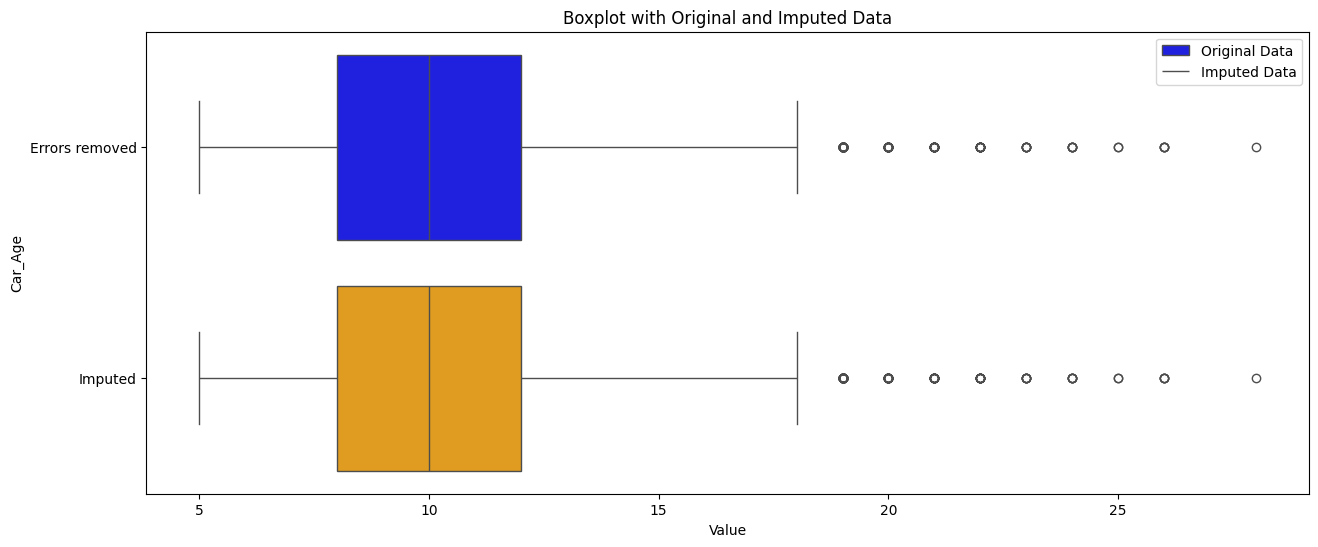

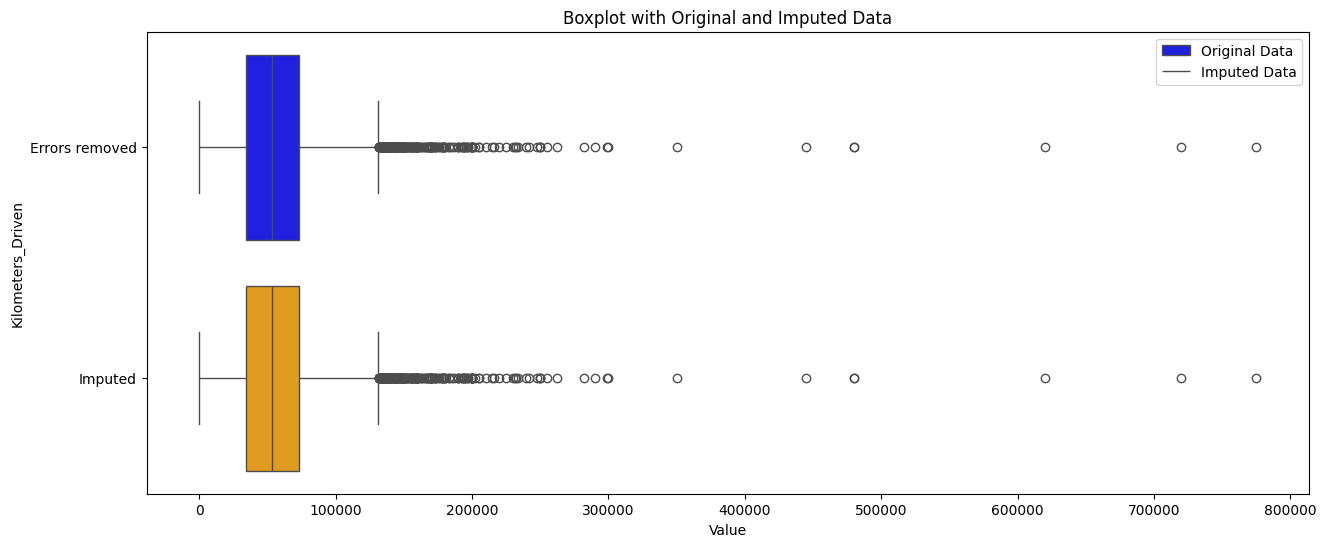

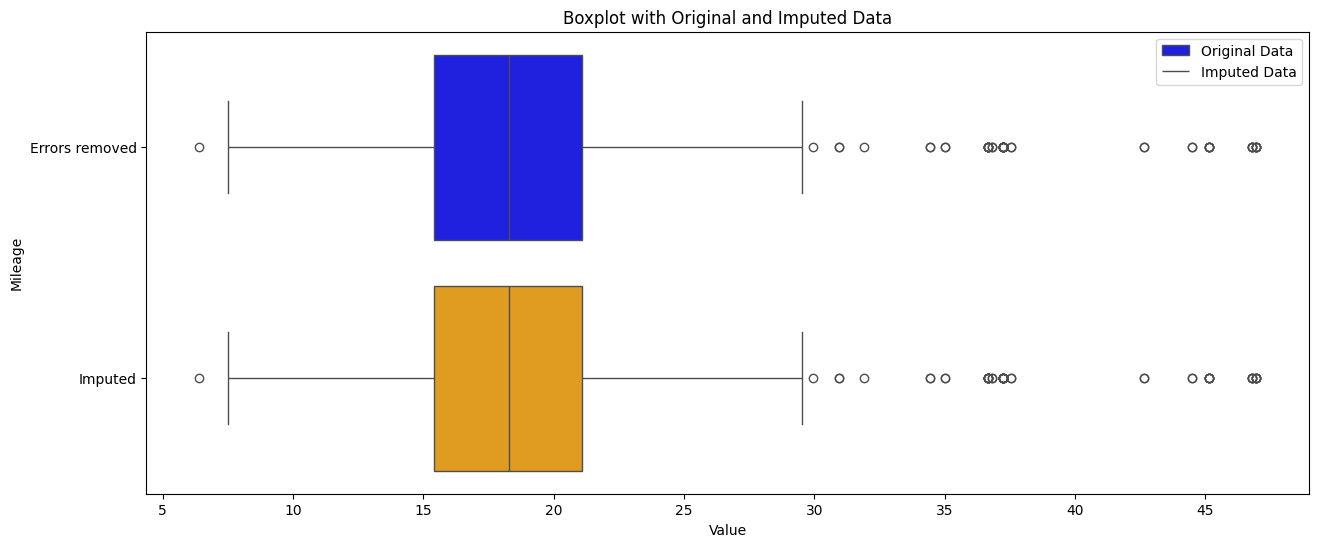

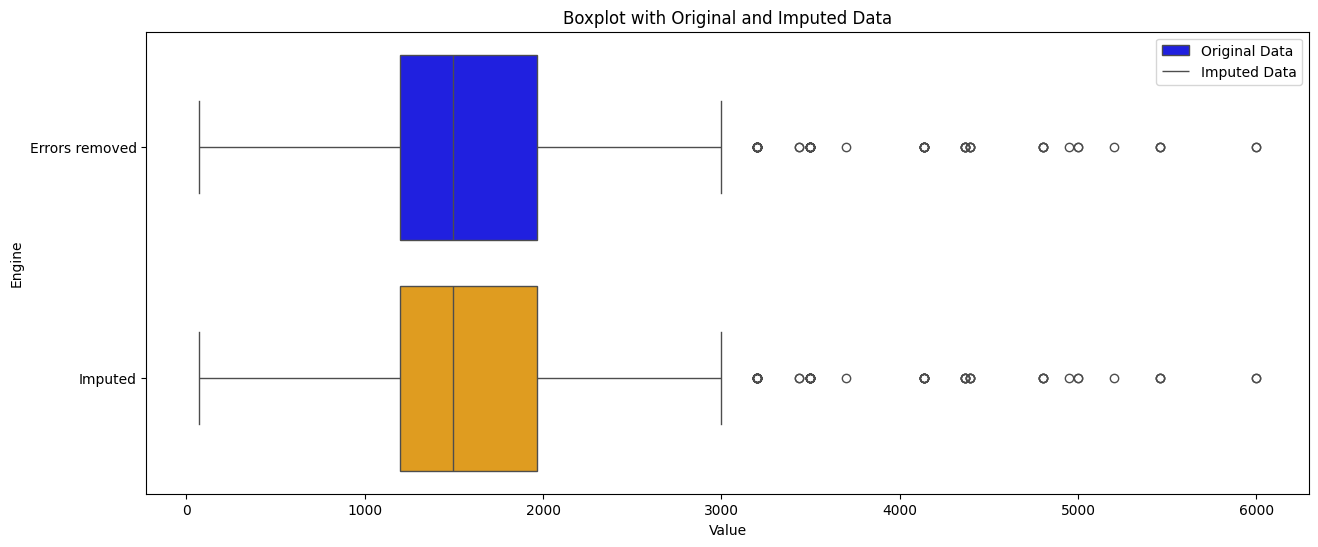

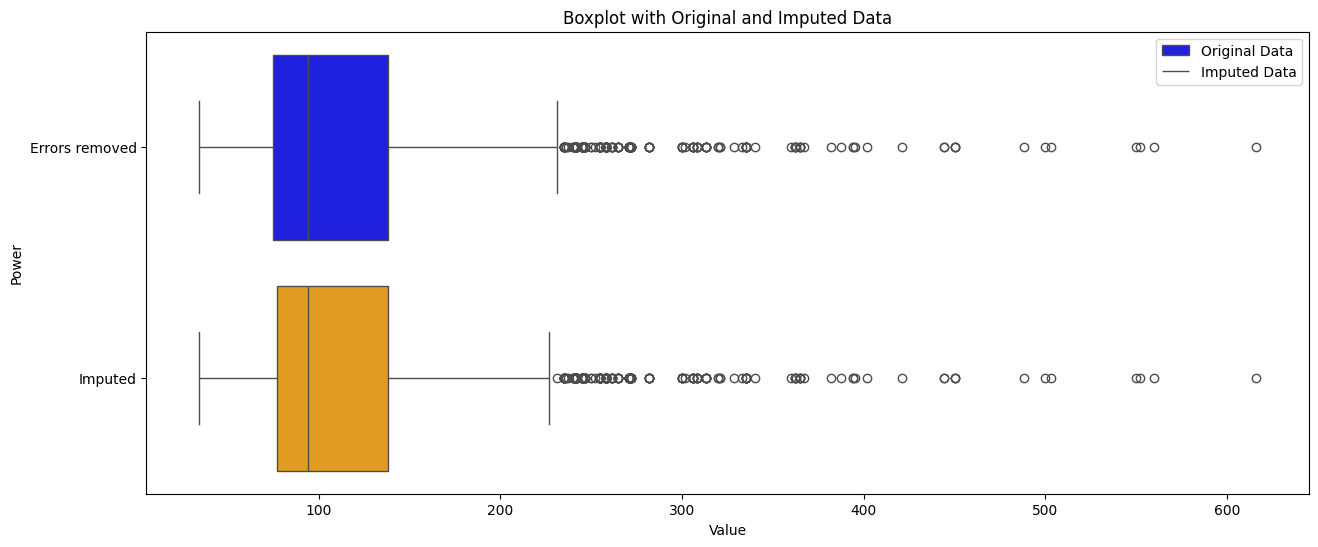

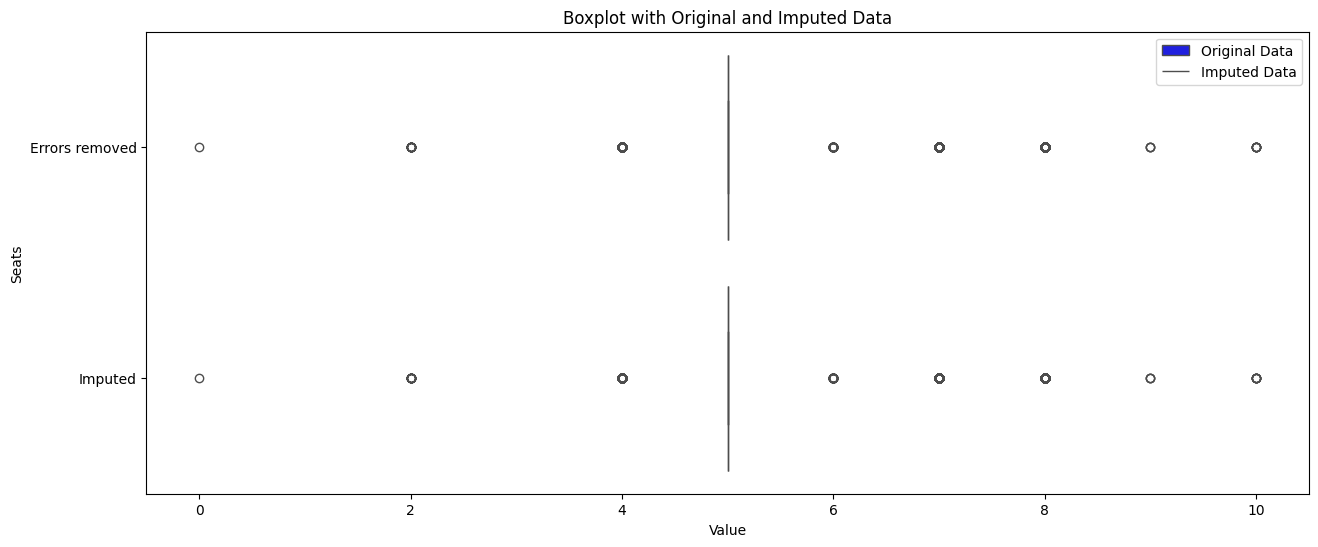

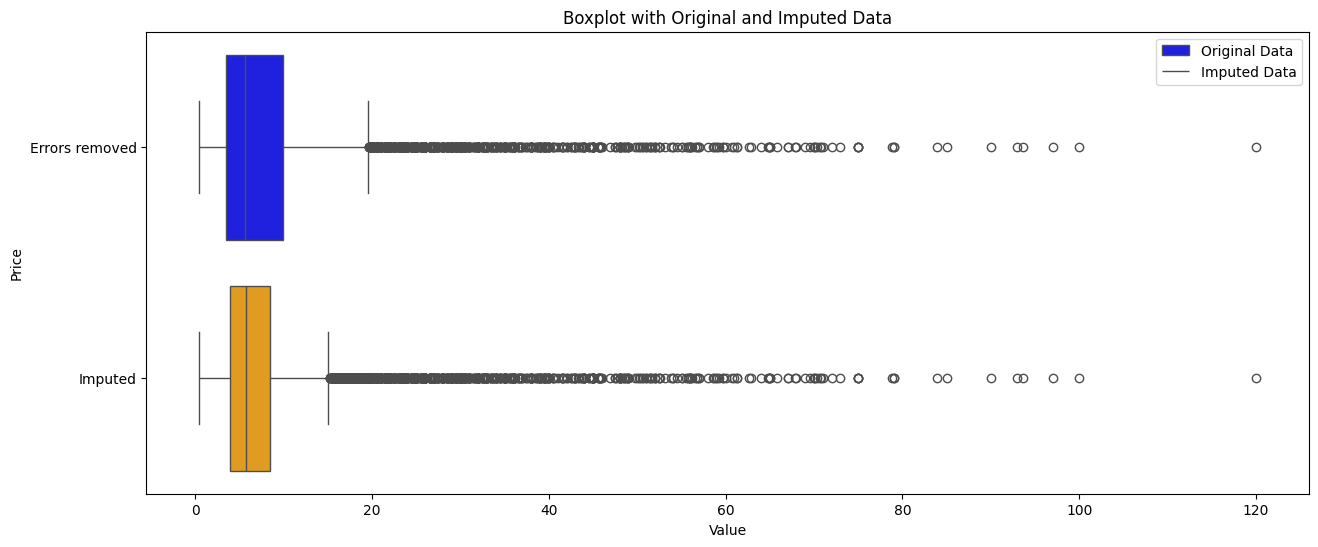

In [ ]:
#boxplot
df['Data Type'] = 'Original'
df_updated['Data Type'] = 'Errors removed'
df_cleaned['Data Type'] = 'Imputed'


for column in columns_to_boxplot:
  plot.figure(figsize=(15, 6))
  #sb.boxplot(x=column, y = 'Data Type', data=df, color='cyan')
  sb.boxplot(x=column, y = 'Data Type', data=df_updated, color='blue')
  sb.boxplot(x=column, y = 'Data Type', data=df_cleaned, color='orange')
  plot.legend(labels=['Original Data', 'Imputed Data'])
  plot.xlabel('Value')
  plot.ylabel(column)
  plot.title('Boxplot with Original and Imputed Data')
  plot.show()


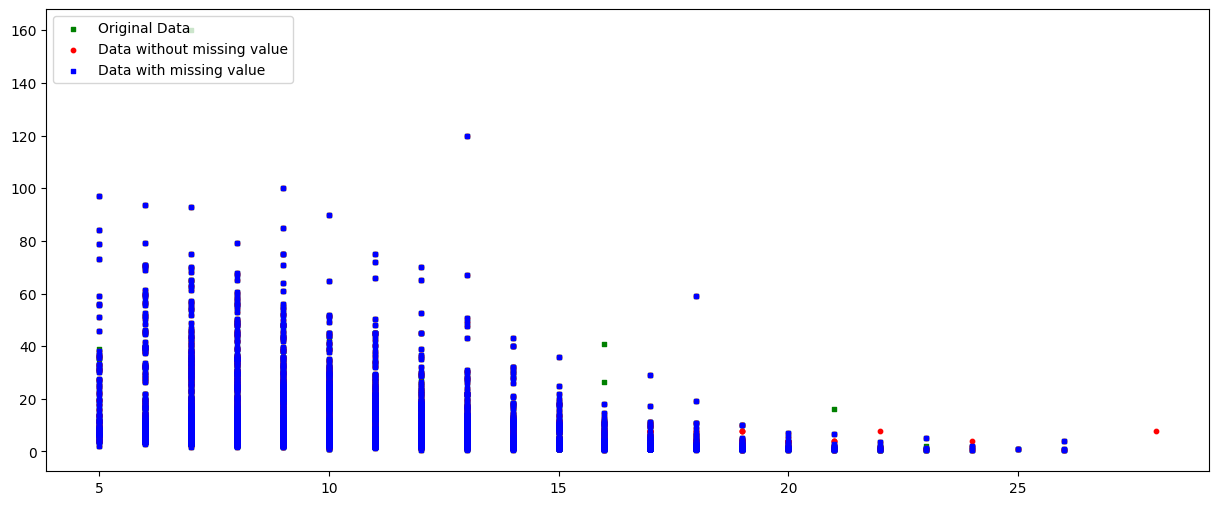

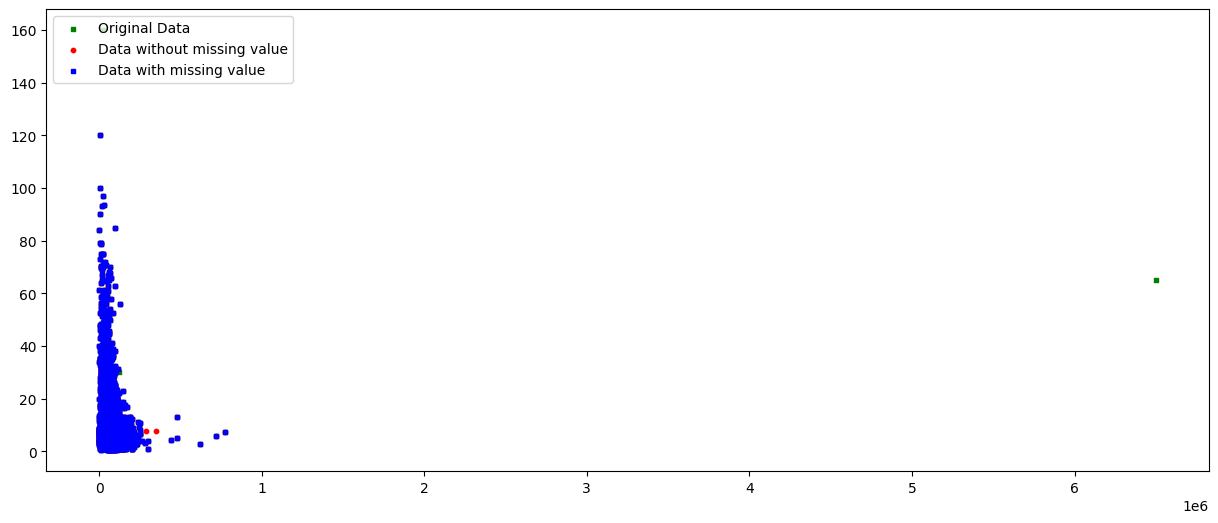

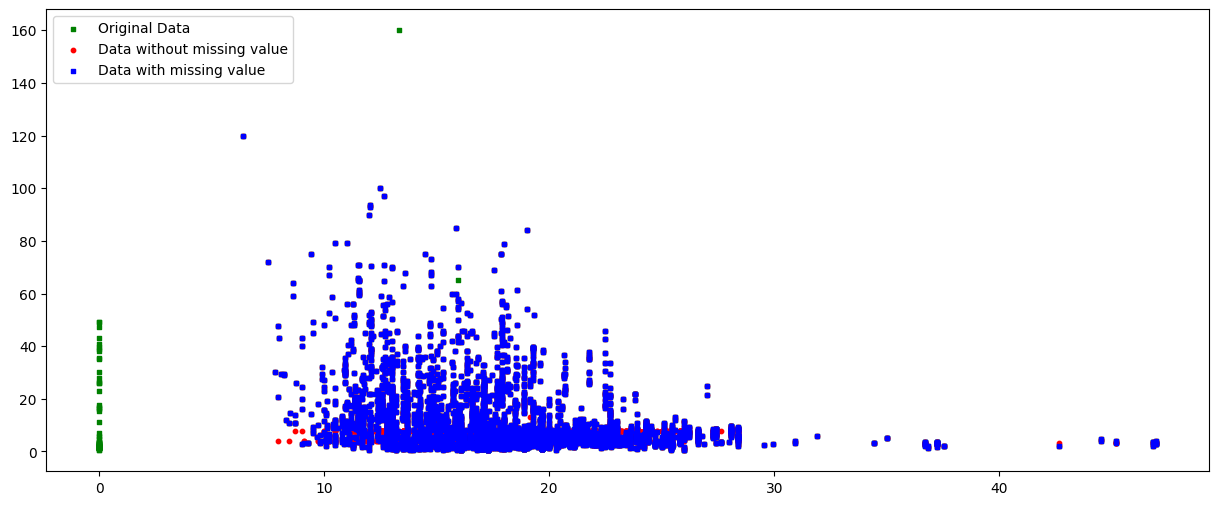

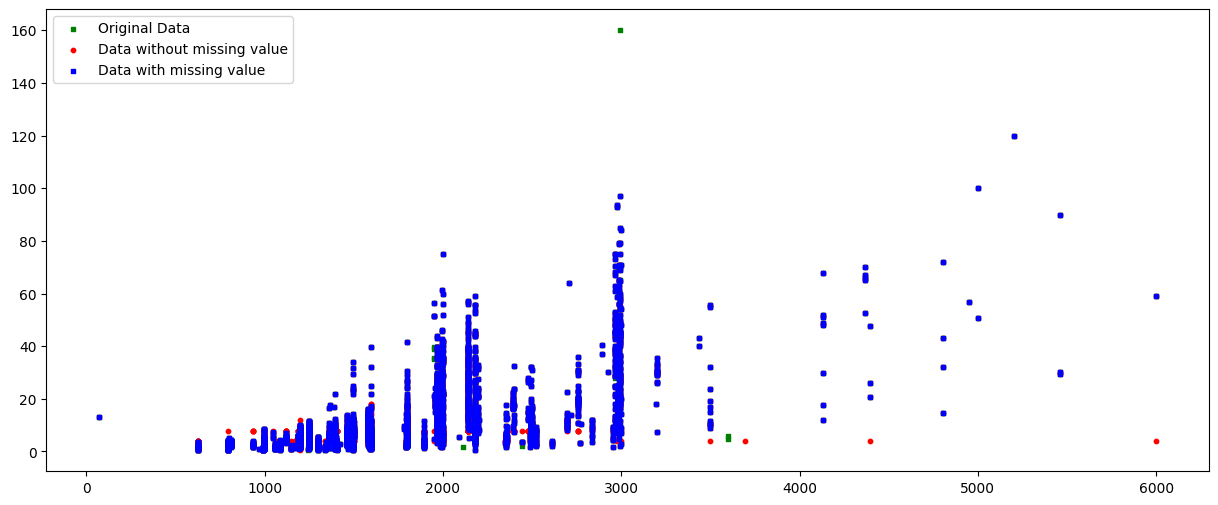

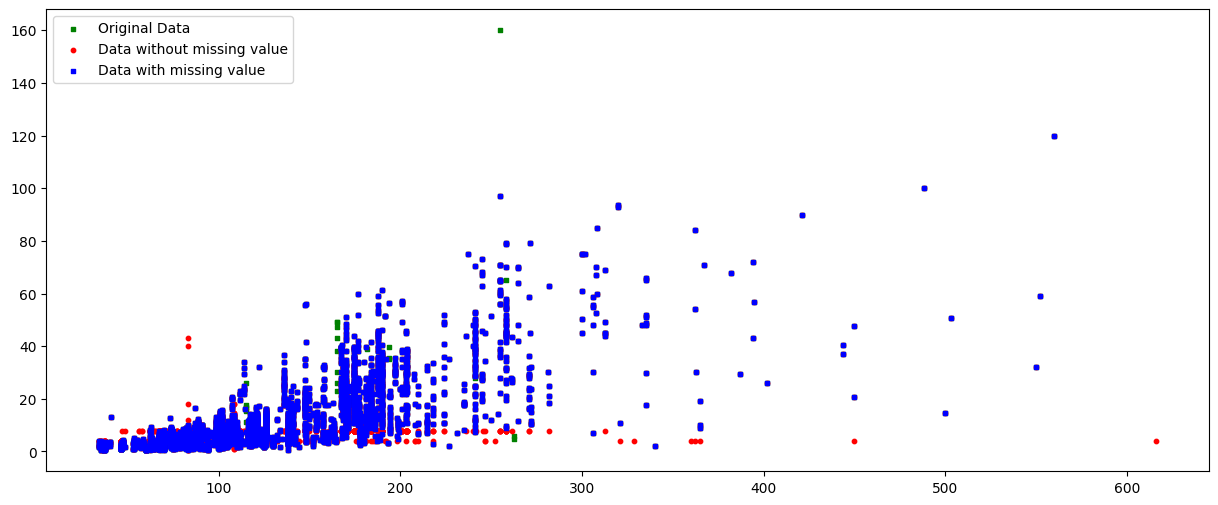

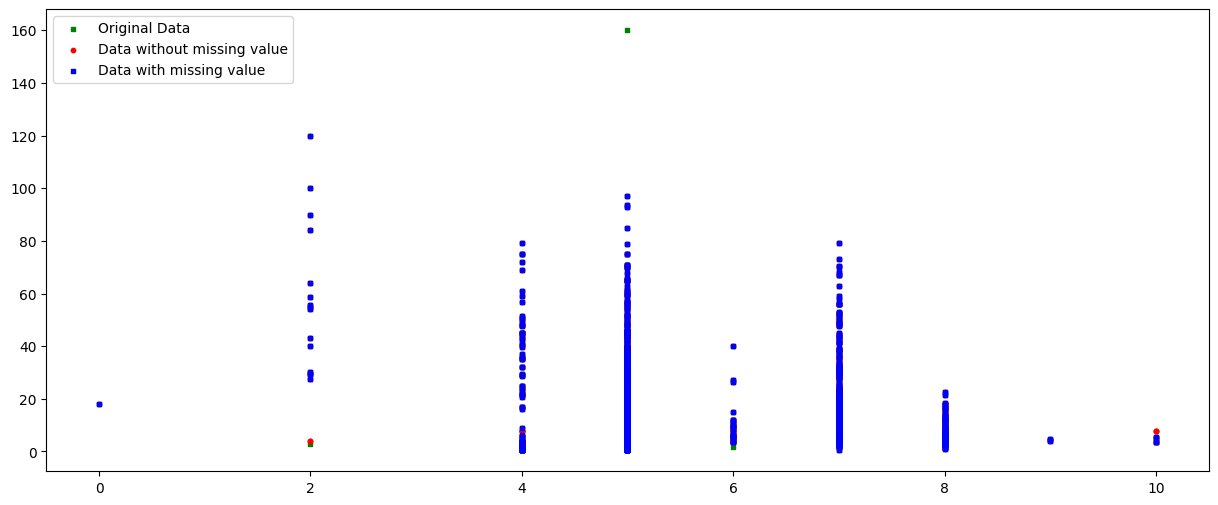

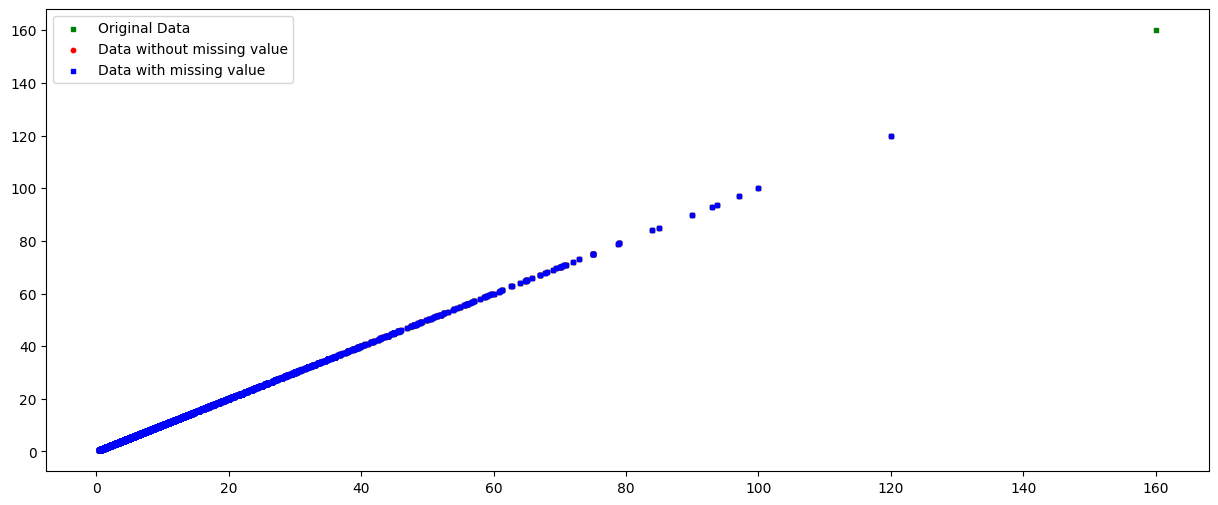

In [ ]:
#scatterplot in a single graph

for column in columns_to_boxplot:
  fig = plot.figure(figsize=(15, 6))
  ax1 = fig.add_subplot(111)

  ax1.scatter(x=df[column], y=df['Price'], s=10, c='g', marker="s", label='Original Data')
  ax1.scatter(x=df_cleaned[column], y=df_cleaned['Price'], s=10, c='r', marker="o", label='Data without missing value')
  ax1.scatter(x=df_updated[column], y=df_updated['Price'], s=10, c='b', marker="s", label='Data with missing value')
  plot.legend(loc='upper left')
plot.show()

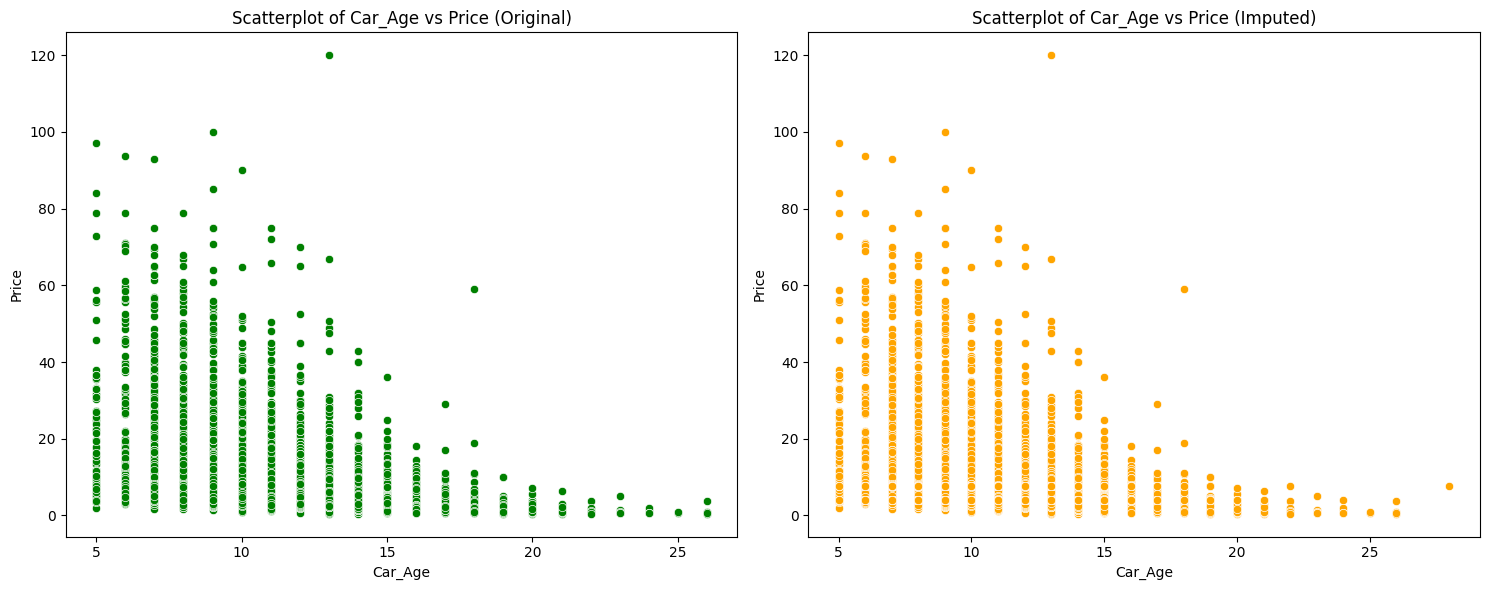

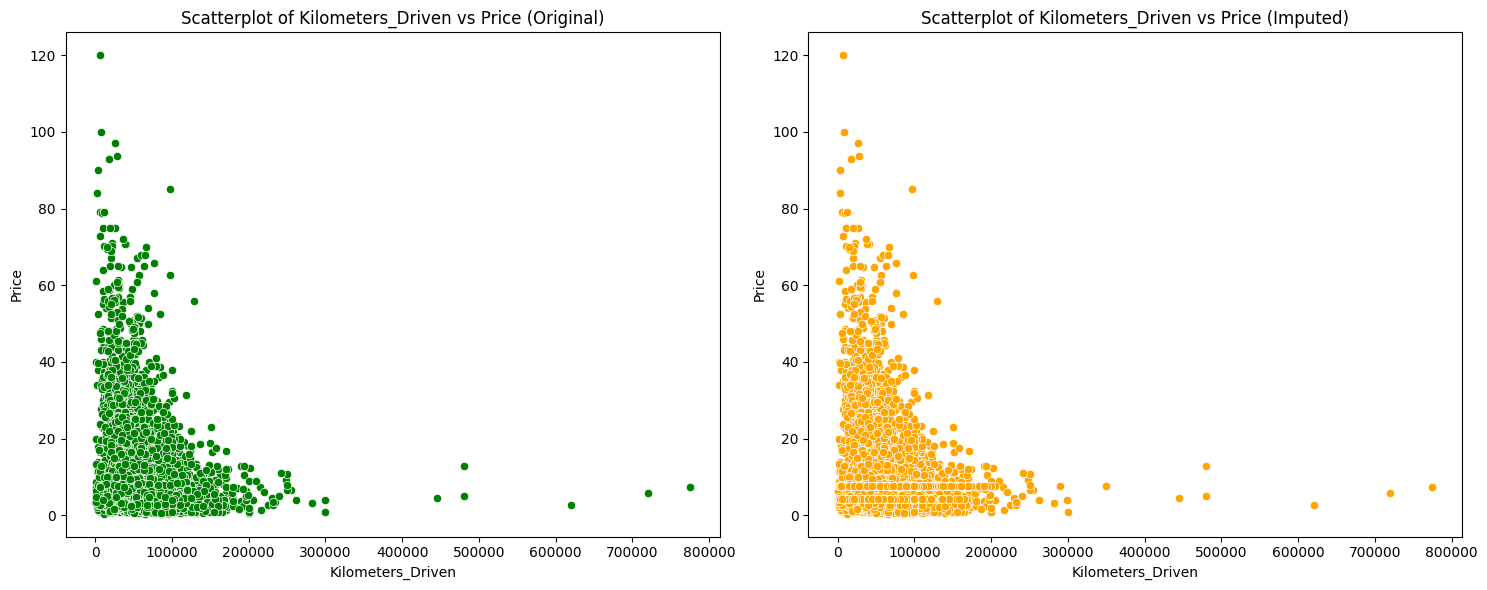

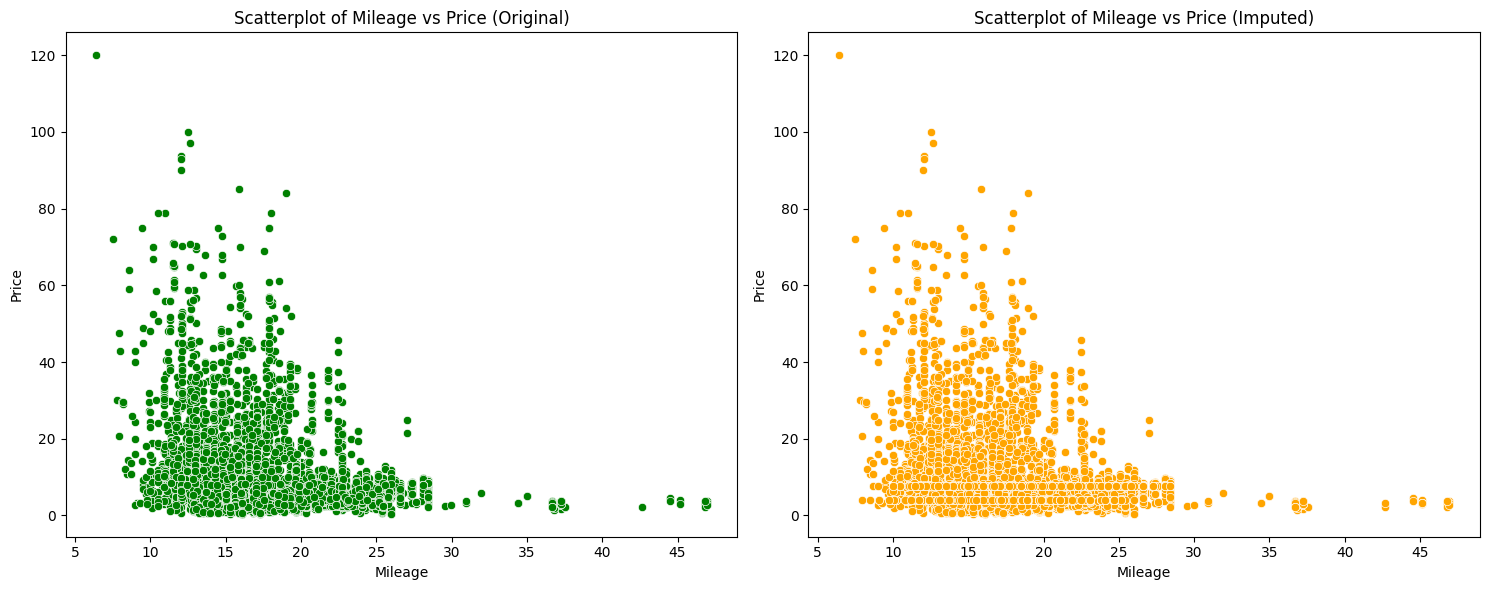

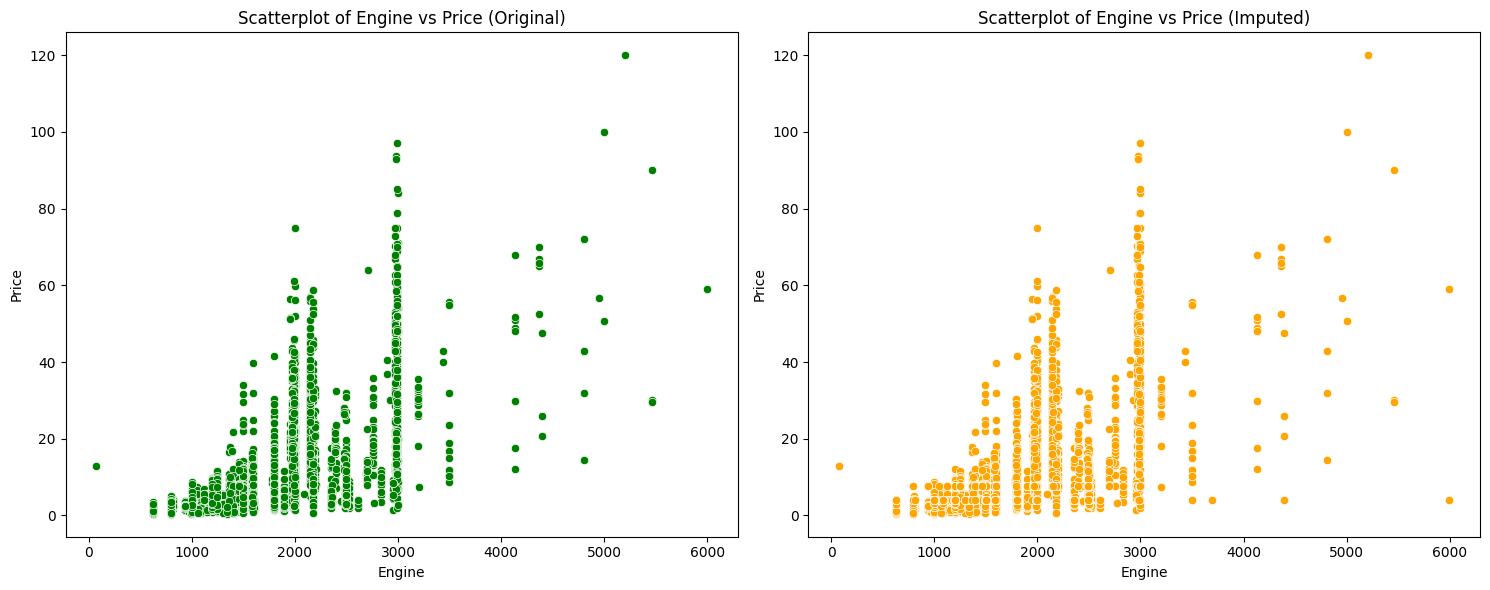

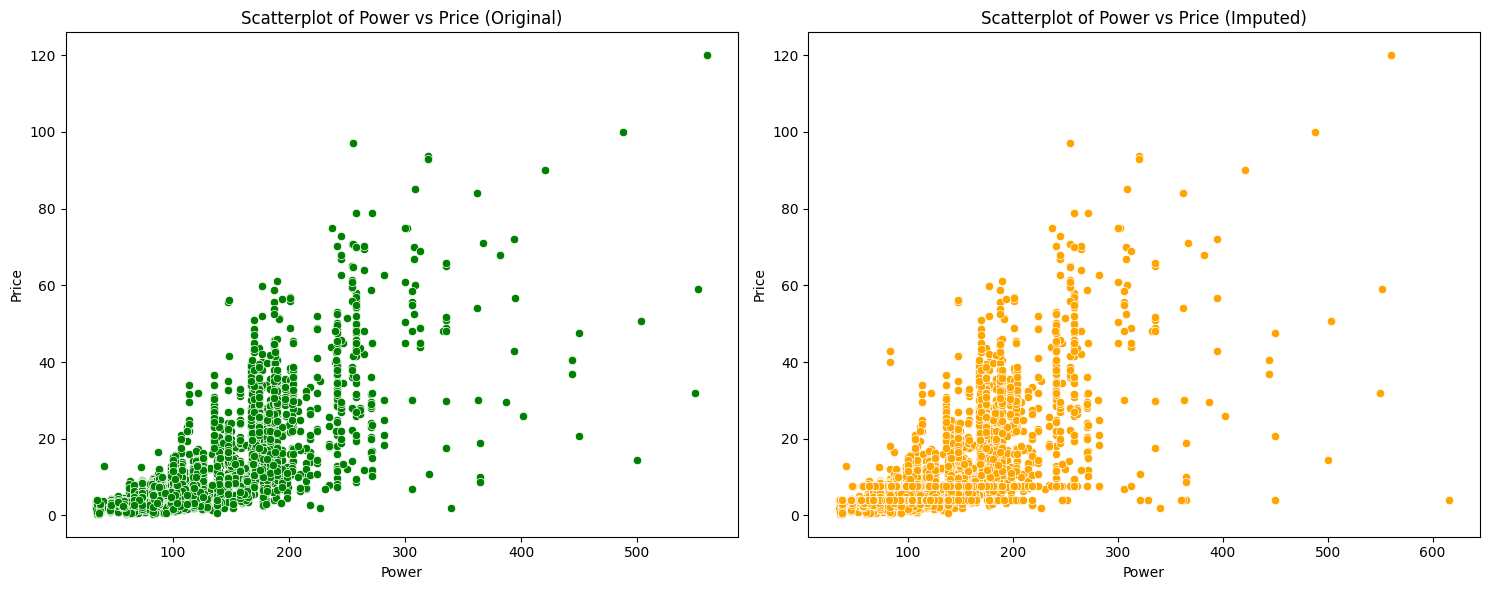

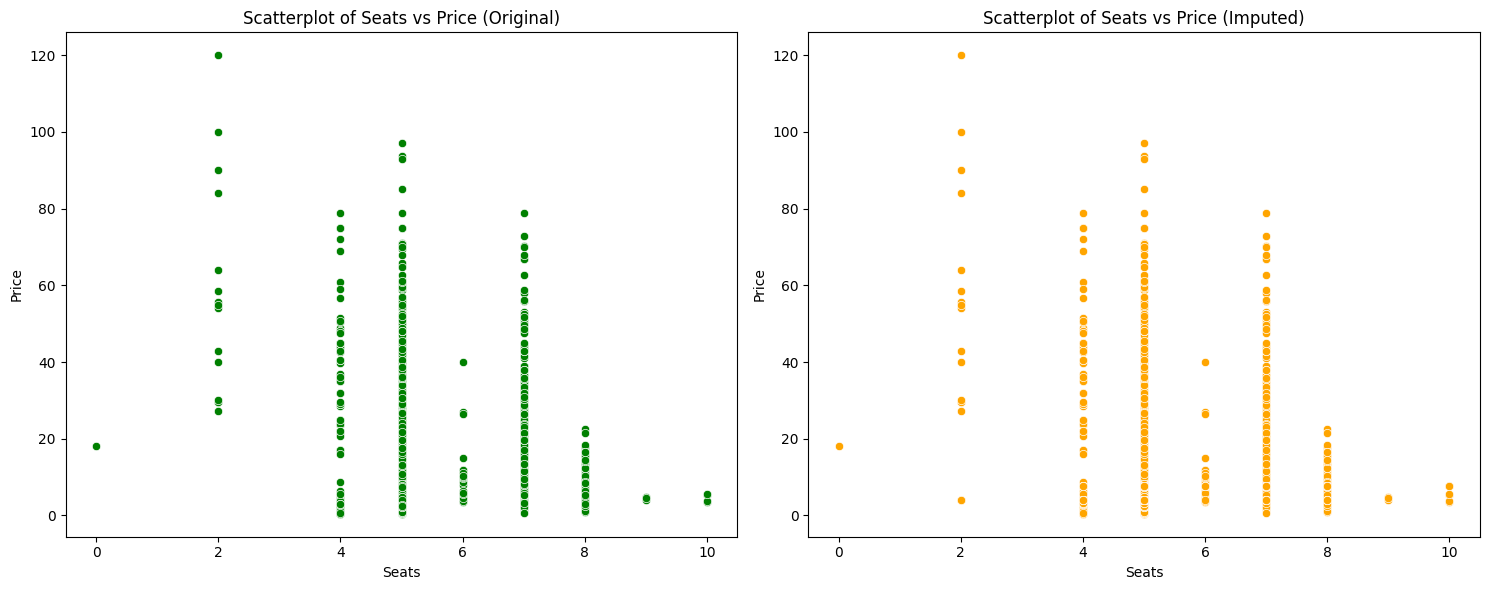

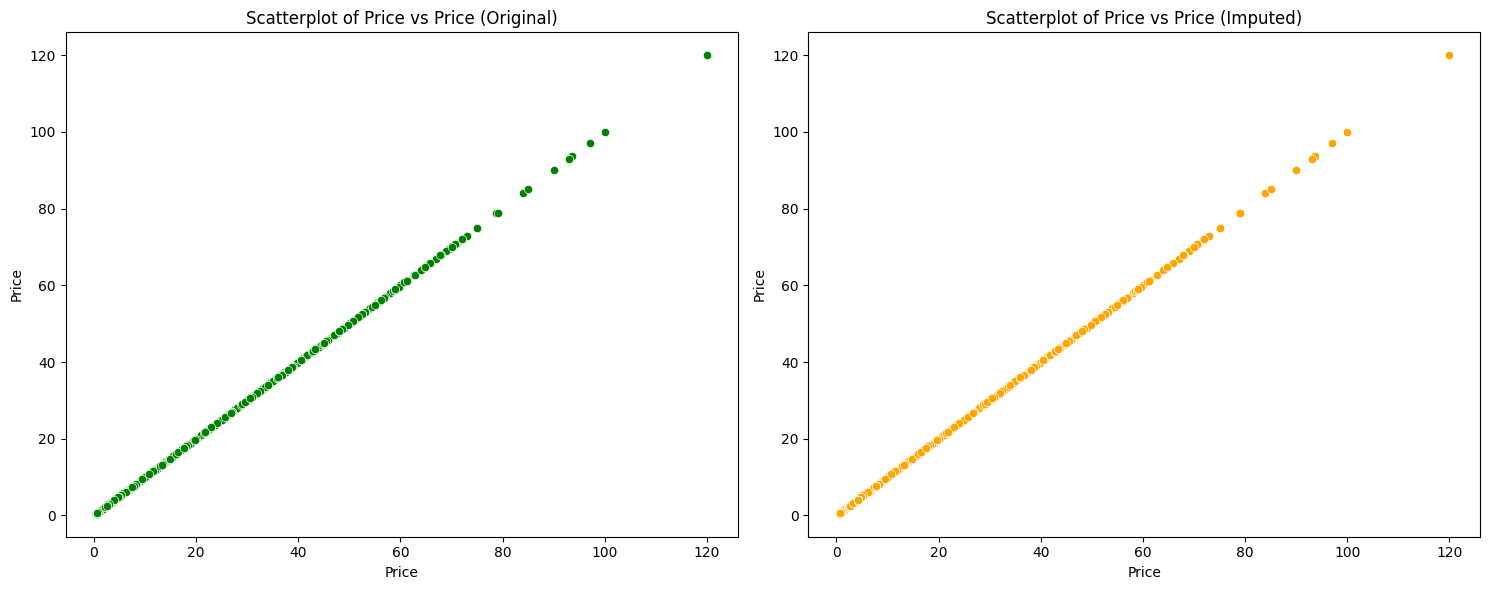

In [ ]:
#scatterplot for comparision
for column in columns_to_boxplot:
  plot.figure(figsize=(15, 6))

  #Scatterplot for dataset with missing values
  plot.subplot(1, 2, 1)
  sb.scatterplot(data=df_updated, x=column, y='Price', color='green')
  plot.title(f'Scatterplot of {column} vs Price (Original)')
  plot.xlabel(column)
  plot.ylabel('Price')

  #Scatterplot for cleaned dataset
  plot.subplot(1, 2, 2)
  sb.scatterplot(data=df_cleaned, x=column, y='Price', color='orange')
  plot.title(f'Scatterplot of {column} vs Price (Imputed)')
  plot.xlabel(column)
  plot.ylabel('Price')

  plot.tight_layout()
  plot.show()

In [ ]:
correlation_coefficients = {}
for col in columns_to_calculate:
    correlation_coefficient = df_cleaned['Price'].corr(df_cleaned[col])
    correlation_coefficients[col] = correlation_coefficient
    print("Correlation coefficient between 'Price' and '{}': {:.2f}".format(col, correlation_coefficient))


Correlation coefficient between 'Price' and 'Car_Age': -0.28
Correlation coefficient between 'Price' and 'Kilometers_Driven': -0.14
Correlation coefficient between 'Price' and 'Mileage': -0.29
Correlation coefficient between 'Price' and 'Engine': 0.62
Correlation coefficient between 'Price' and 'Power': 0.72
Correlation coefficient between 'Price' and 'Seats': 0.06


The correlation coefficients between 'Price' and various features provide insights into their relationships. There is a moderate negative correlation with 'Car_Age', 'Kilometers_Driven', and 'Mileage', indicating that as these factors increase, the price tends to decrease. On the other hand, there are strong positive correlations with 'Engine' and 'Power', suggesting that cars with larger engine capacities and higher power outputs tend to command higher prices. The correlation with 'Seats' is very weak, implying that seating capacity has minimal influence on price.

Regarding data distribution and outliers, the interquartile ranges (IQRs) provide a measure of the spread of the data. For 'Car_Age', 'Mileage', 'Engine', 'Power', and 'Price', the IQRs suggest varying degrees of variability in the data. 'Kilometers_Driven' exhibits a wide IQR, indicating significant variability in the distances covered by cars. Notably, 'Seats' show no variability within the IQR, indicating a consistent seating capacity across most cars.

The lower and upper limits for outliers provide thresholds beyond which data points are considered unusual. For instance, 'Kilometers_Driven' has negative lower limit, suggesting the presence of negative values in the dataset, which might need further investigation. 'Power' also has a negative lower limit, indicating potential outliers with very low power outputs. Conversely, 'Engine' has a large upper limit, suggesting the presence of outliers with exceptionally large engine capacities. Similarly, 'Price' has both negative and positive lower and upper limits, indicating potential outliers at both ends of the price spectrum.

In comparing the original and updated/cleaned data, we can observe changes in the correlation coefficients between the 'Price' column and other features, as well as alterations in the interquartile ranges (IQRs) and outlier limits for each feature.

In the first set, the correlation coefficients between 'Price' and 'Car_Age', 'Kilometers_Driven', and 'Mileage' were -0.30, -0.17, and -0.33 respectively. This indicates moderate negative correlations, suggesting that as these factors increase, the price tends to decrease. On the other hand, 'Price' showed strong positive correlations with 'Engine' and 'Power' (0.66 and 0.78 respectively), implying that cars with larger engine capacity and higher power output tend to have higher prices. The correlation coefficient between 'Price' and 'Seats' was very weak (0.06).

In the second set, the correlation coefficients underwent slight changes: -0.28 for 'Car_Age', -0.14 for 'Kilometers_Driven', and -0.29 for 'Mileage'. These changes suggest a slightly weaker negative correlation between these features and 'Price' compared to the first set. Additionally, the correlations between 'Price' and 'Engine' and 'Power' decreased to 0.62 and 0.72 respectively, indicating a weaker positive relationship. The correlation coefficient between 'Price' and 'Seats' remained the same at 0.06.

Regarding the IQRs and outlier limits, there were slight variations between the two sets of data. For example, in the second set, the IQR for 'Power' increased decreased to 61.2, and the lower and upper limits changed accordingly. Similarly, the IQR for 'Price' decreased to 4.53, leading to changes in the outlier limits.

Overall, while the correlation coefficients between 'Price' and certain features shifted slightly between the two sets of data, the general trends remained consistent. Additionally, minor changes in the IQRs and outlier limits reflect variations in the distribution of the data.